In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.book import *
from nltk.corpus import stopwords
from nltk import pos_tag


from collections import Counter

import contractions

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.interpolate import UnivariateSpline

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.book import *
from nltk.corpus import stopwords
from nltk import pos_tag


from collections import Counter

import contractions

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.interpolate import UnivariateSpline

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# <span style='color:Orange'>I. Clean text</span> 

In [2]:
def clean_text(text):
    nconts_text = contractions.fix(text)
    clean = nconts_text.replace("_", "")
    return clean

In [1]:
def text_stats(tokens, text):
    num_tokens = len(tokens)
    num_types = len(set(tokens))
    sent_av = num_tokens/len(sent_tokenize(text))

    print(f"The number of tokens in this text is {num_tokens}.",
         f"\nThe number of types is {num_types}.", 
         f"\nThe TTR (type-token ratio) of this text is {num_types/num_tokens}.",
         f"\nThe average sentence length is {sent_av}.")

In [4]:
def custom_tokenize(text):
    tokens = word_tokenize(text)
    words = [token.lower() for token in tokens if token.isalnum()]
    return words

In [5]:
def custom_dispersion(tokens, words):
    for word in words:
        for ele, token in enumerate(tokens):
            if token == word:
                plt.plot(ele, word, 'o', color = 'b', markersize = 3)
                plt.title('Dispersion Plot of Words')
                plt.xlabel("Length of Text in Words")
                plt.ylabel("Key Words")
                
                plt.ylim(-1, len(words))

In [6]:
def open_file(path):
    with open(path, "r", encoding = "utf-8") as file:
        text = file.read()
        return text

In [7]:
orange = open_file("C:/Users/Hien Bach/text_analysis_jupyter/data/my_sweet_orange_tree.txt")

In [8]:
clean_orange = clean_text(orange)

In [9]:
tokens_orange = custom_tokenize(orange)

In [10]:
num_tokens = len(tokens_orange)
num_types =  len(set(tokens_orange))
sent_av = num_tokens/len(sent_tokenize(orange))
print(num_tokens)
print(num_types)
print(sent_av)

43023
3815
12.88885560215698


In [11]:
novel =nltk.Text(tokens_orange)

# <span style='color:Orange'>II. Dispersion Plot</span>

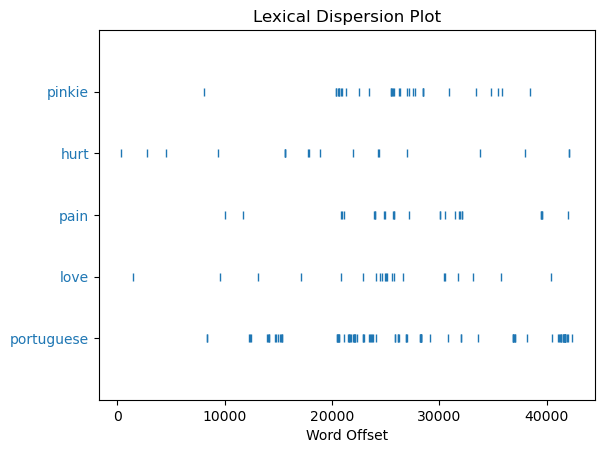

In [12]:
novel.dispersion_plot(["portuguese", "love", "pain", "hurt", "pinkie"])

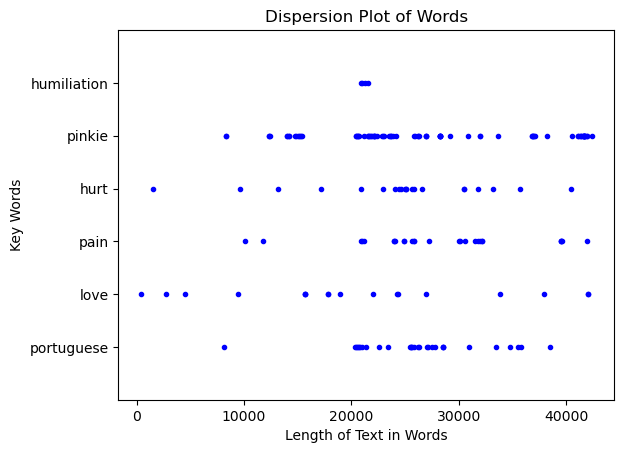

In [13]:
custom_dispersion(novel,["portuguese", "love", "pain", "hurt", "pinkie", "humiliation"] ) 

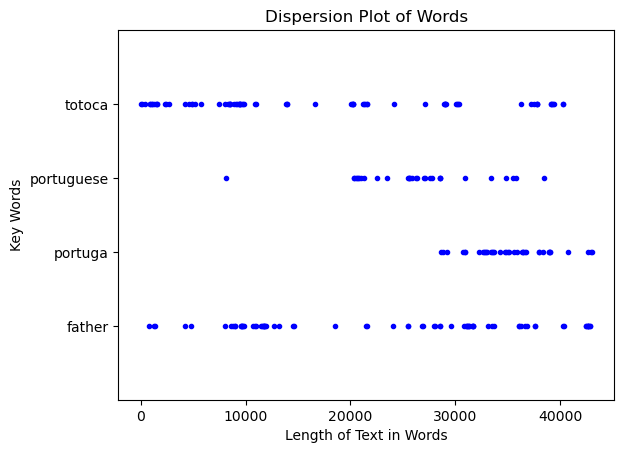

In [14]:
custom_dispersion(novel,["father", "portuga", "portuguese", "totoca"]) 
plt.savefig('dispersion_plot.png', dpi=300, bbox_inches='tight')

# <span style='color:Orange'>III. Word Frequency</span>

In [15]:
FreqDist(novel).most_common(20)

[('i', 1836),
 ('the', 1788),
 ('to', 1341),
 ('and', 1175),
 ('a', 978),
 ('you', 944),
 ('it', 772),
 ('was', 679),
 ('t', 649),
 ('he', 636),
 ('s', 596),
 ('my', 565),
 ('me', 547),
 ('of', 523),
 ('that', 512),
 ('in', 458),
 ('but', 330),
 ('with', 306),
 ('on', 303),
 ('at', 278)]

In [16]:
unfiltered = FreqDist(novel).most_common(100)
unfiltered[15]

('in', 458)

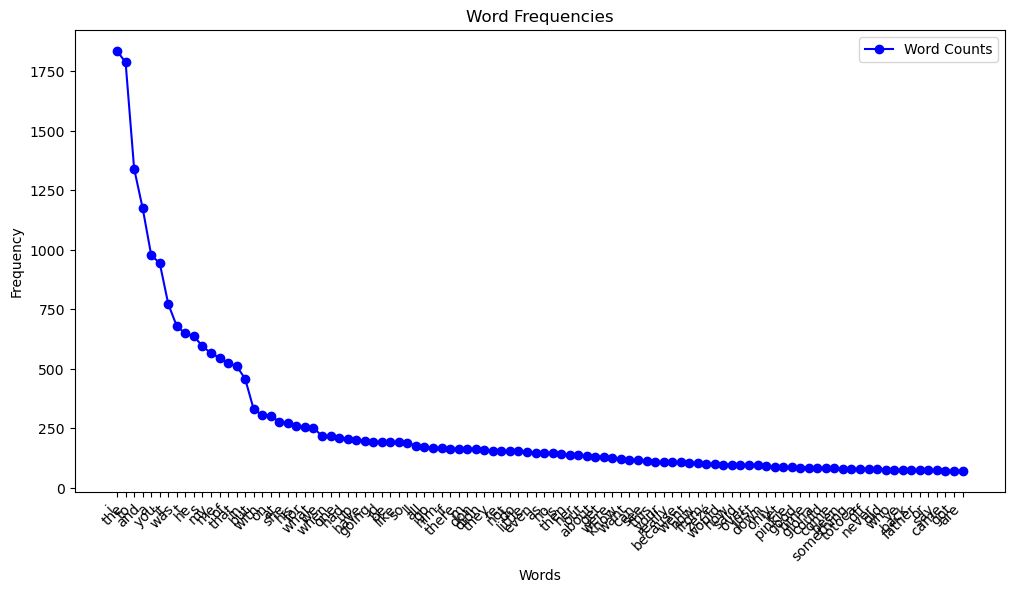

In [17]:
words, counts = zip(*unfiltered)

plt.figure(figsize=(12, 6))
plt.plot(words, counts, marker='o', linestyle='-', color='b', label='Word Counts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequencies')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.show()

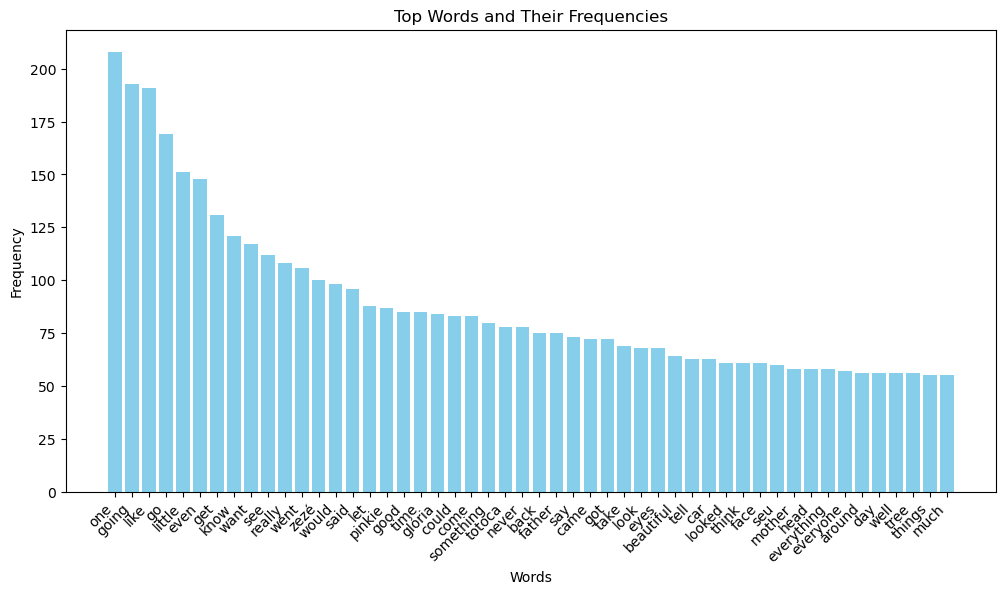

In [18]:
stop_words = stopwords.words('english')
filtered_words = [w for w in novel if w not in stop_words]
FreqDist(filtered_words).most_common(50)
top_fifty = FreqDist(filtered_words).most_common(50)

words, counts = zip(*top_fifty)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words and Their Frequencies')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
lst = ["pinkie", "glória", "seu", "totoca", "zezé"]
custom_sw = stopwords.words("portuguese")

custom_sw.extend(lst)
print(custom_sw)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

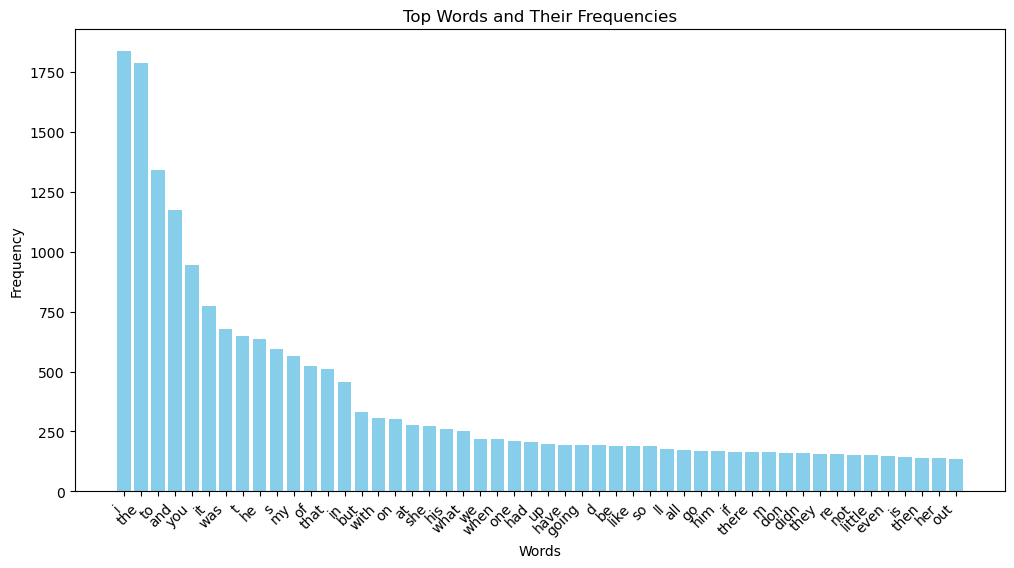

In [20]:
custom_filtered_words = [w for w in novel if w not in custom_sw]

custom_top_fifty = FreqDist(custom_filtered_words).most_common(50)

words, counts = zip(*custom_top_fifty)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words and Their Frequencies')
plt.xticks(rotation=45, ha='right')
plt.show()

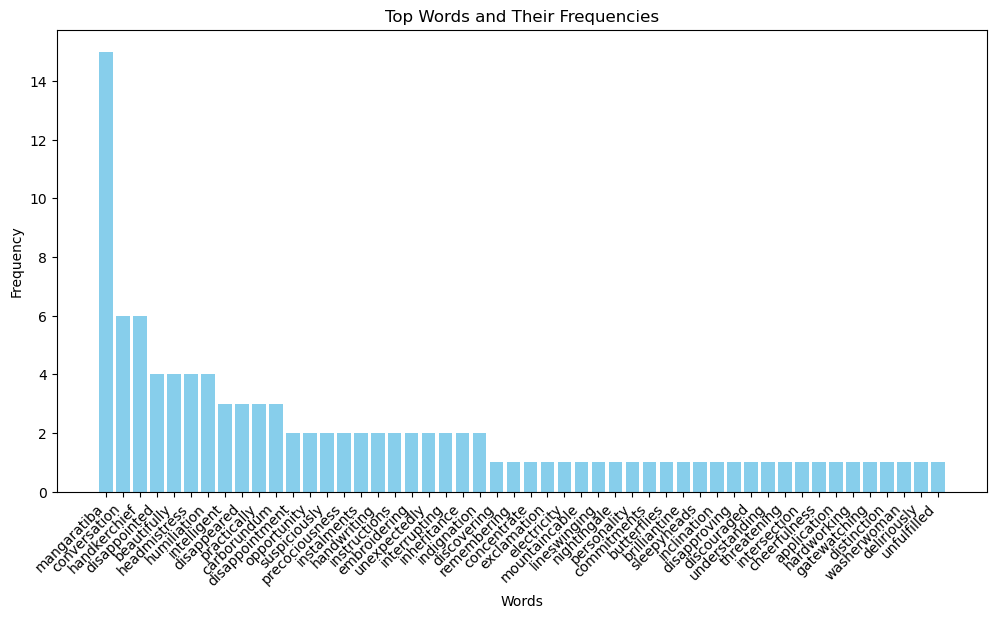

In [21]:
custom_filtered_words = [w for w in novel if w not in custom_sw and len(w) > 10]

custom_top_fifty = FreqDist(custom_filtered_words).most_common(50)

words, counts = zip(*custom_top_fifty)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words and Their Frequencies')
plt.xticks(rotation=45, ha='right')
plt.show()

# <span style='color:Orange'>IV. TTR and MATTR</span>

In [22]:
def ttr(seg_words):
    types = set(seg_words)
    ttr = len(types)/len(seg_words)
    return(ttr)

In [23]:
def averge_word_length(segment):
    total_characters = 0
    for word in segment:
        total_characters = total_characters + len(word)
    awl = total_characters/len(segment)
    return(awl)

In [24]:
def pos_counts(tagged_segment):
    the_count = the_count = (Counter(tag for x,tag in tagged_segment))
    nouns = the_count["NOUN"]
    verbs = the_count["VERB"]
    adjs = the_count["ADJ"]
    advs = the_count["ADV"]
    return nouns, verbs, adjs, advs

In [25]:
def mattr(tokens_tags):
    window = 3000
    end = len(tokens_tags)-window
    mattr = []

    for item in range (0, end, 1000):
        if item < end:
            tagged_seg = tokens_tags[item: item + window]
            seg_words = [item[0] for item in tagged_seg]
            sttr = ttr(seg_words)
            sawl = averge_word_length(seg_words)
            percent = 100 * (item + window)/len(seg_words)
            nouns, verbs, adjs, advs = pos_counts(tagged_seg)
            seg_lex_div = (nouns + verbs + adjs + advs)/ len(seg_words)
            mattr.append((item, item+window, percent, sttr, sawl, nouns, verbs, adjs, advs, seg_lex_div))
    return mattr

In [26]:
tags_novel = nltk.pos_tag(tokens_orange, tagset = "universal")

text_stats(tokens_orange, clean_orange)

The number of tokens in this text is 43023. 
The number of types is 3815. 
The TTR (type-token ratio) of this text is 0.08867350022081212. 
The average sentence length is 12.88885560215698.


In [27]:
mattr_novel = mattr(tags_novel)

len(mattr_novel)

41

In [28]:
df_novel = pd.DataFrame(mattr_novel, columns = ("window_start", "window_end", "percent", "MATTR", "average_word_length", "nouns", "verbs", "adjectives", "adverbs", "lexical_diversity"))

df_novel

,window_start,window_end,percent,MATTR,average_word_length,nouns,verbs,adjectives,adverbs,lexical_diversity
0,0,3000,100.000000,0.248667,3.720333,613,754,226,198,0.597000
1,1000,4000,133.333333,0.263667,3.775667,588,765,240,197,0.596667
2,2000,5000,166.666667,0.276333,3.796667,638,754,230,212,0.611333
3,3000,6000,200.000000,0.272333,3.759667,650,751,225,219,0.615000
4,4000,7000,233.333333,0.272667,3.681333,672,750,217,216,0.618333
5,5000,8000,266.666667,0.267667,3.678667,627,766,238,211,0.614000
6,6000,9000,300.000000,0.260667,3.680333,629,755,252,210,0.615333
7,7000,10000,333.333333,0.255000,3.726667,626,749,266,232,0.624333
8,8000,11000,366.666667,0.258333,3.783000,674,719,247,232,0.624000
9,9000,12000,400.000000,0.259000,3.767000,688,728,218,208,0.614000


# <span style='color:Orange'>V. MATTR & Lexical diversity in graph</span>

In [29]:
average = sum(df_novel["MATTR"])/len(df_novel)

## <span style='color:green'>With labels</span>

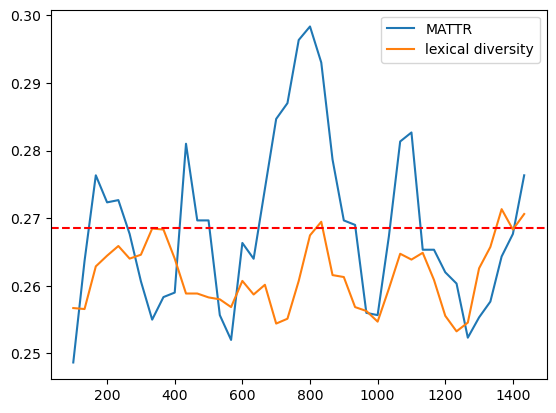

In [30]:
plt.plot(df_novel["percent"], df_novel["MATTR"], label="MATTR")
plt.plot(df_novel["percent"], df_novel["lexical_diversity"]*0.43, label="lexical diversity")
plt.axhline(y = average, color = 'r', linestyle = '--') 
plt.legend()

## <span style='color:green'>Without labels</span>

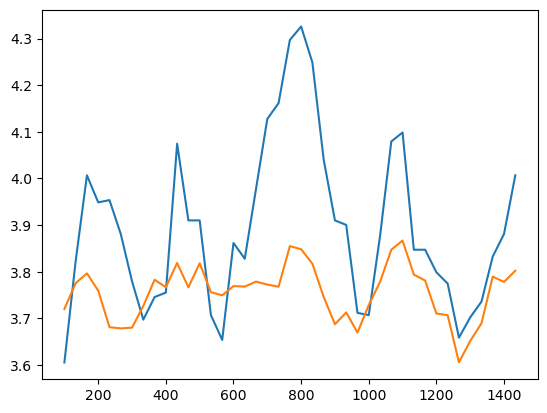

In [31]:
plt.plot(df_novel["percent"], df_novel["MATTR"]*14.5, df_novel["percent"], df_novel["average_word_length"])

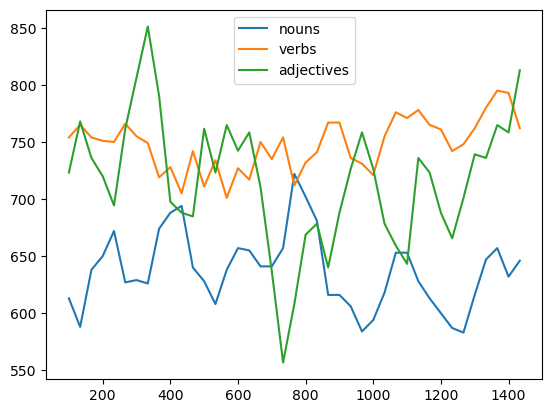

In [32]:
plt.plot(df_novel["percent"], df_novel["nouns"], label="nouns")
plt.plot(df_novel["percent"], df_novel["verbs"], label="verbs")
plt.plot(df_novel["percent"], df_novel["adjectives"]*3.2, label="adjectives" )
plt.legend()

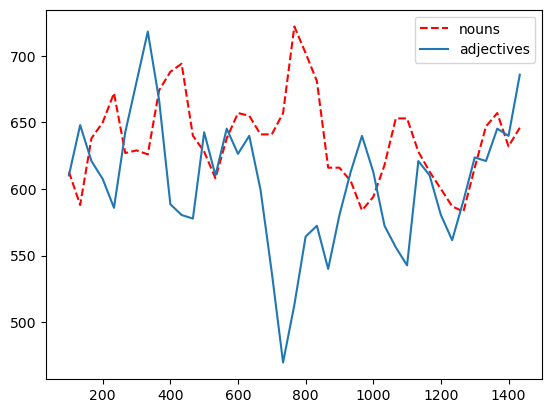

In [33]:
plt.plot(df_novel["percent"], df_novel["nouns"], color = "red", linestyle = "--", label = "nouns")
plt.plot(df_novel["percent"], df_novel["adjectives"]*2.7, label = "adjectives")
plt.legend()

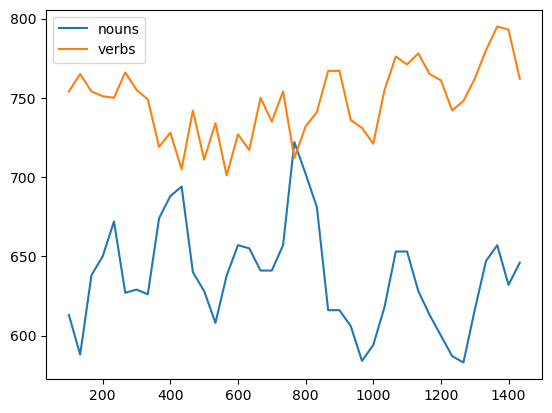

In [34]:
plt.plot(df_novel["percent"], df_novel["nouns"], label = "nouns")
plt.plot(df_novel["percent"], df_novel["verbs"], label = "verbs")
plt.legend()

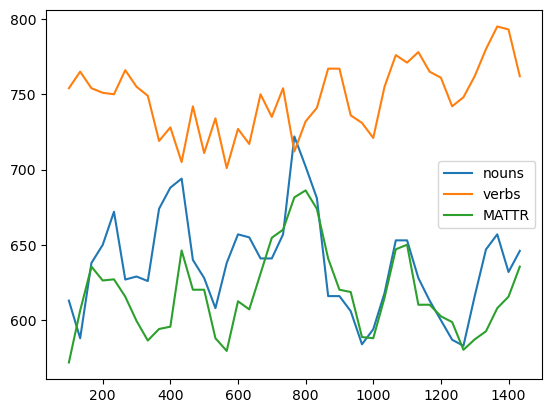

In [35]:
plt.plot(df_novel["percent"], df_novel["nouns"], label="nouns")
plt.plot(df_novel["percent"], df_novel["verbs"], label="verbs")
plt.plot(df_novel["percent"], df_novel["MATTR"]*2300, label="MATTR")
plt.legend()

## <span style='color:green'>Smallest and Largest</span>

In [36]:
smallest = df_novel.nsmallest(10, "MATTR")
smallest

,window_start,window_end,percent,MATTR,average_word_length,nouns,verbs,adjectives,adverbs,lexical_diversity
0,0,3000,100.000000,0.248667,3.720333,613,754,226,198,0.597000
14,14000,17000,566.666667,0.252000,3.749667,638,701,239,214,0.597333
35,35000,38000,1266.666667,0.252333,3.606000,583,748,219,226,0.592000
7,7000,10000,333.333333,0.255000,3.726667,626,749,266,232,0.624333
36,36000,39000,1300.000000,0.255333,3.651667,616,762,231,223,0.610667
13,13000,16000,533.333333,0.255667,3.756333,608,734,226,232,0.600000
27,27000,30000,1000.000000,0.255667,3.728667,594,721,227,235,0.592333
26,26000,29000,966.666667,0.256000,3.669667,584,731,237,236,0.596000
37,37000,40000,1333.333333,0.257667,3.689667,647,780,230,197,0.618000
8,8000,11000,366.666667,0.258333,3.783000,674,719,247,232,0.624000


In [37]:
smallest.sort_values("window_start")

,window_start,window_end,percent,MATTR,average_word_length,nouns,verbs,adjectives,adverbs,lexical_diversity
0,0,3000,100.000000,0.248667,3.720333,613,754,226,198,0.597000
7,7000,10000,333.333333,0.255000,3.726667,626,749,266,232,0.624333
8,8000,11000,366.666667,0.258333,3.783000,674,719,247,232,0.624000
13,13000,16000,533.333333,0.255667,3.756333,608,734,226,232,0.600000
14,14000,17000,566.666667,0.252000,3.749667,638,701,239,214,0.597333
26,26000,29000,966.666667,0.256000,3.669667,584,731,237,236,0.596000
27,27000,30000,1000.000000,0.255667,3.728667,594,721,227,235,0.592333
35,35000,38000,1266.666667,0.252333,3.606000,583,748,219,226,0.592000
36,36000,39000,1300.000000,0.255333,3.651667,616,762,231,223,0.610667
37,37000,40000,1333.333333,0.257667,3.689667,647,780,230,197,0.618000


In [38]:
largest = df_novel.nlargest(10, "MATTR")
largest

,window_start,window_end,percent,MATTR,average_word_length,nouns,verbs,adjectives,adverbs,lexical_diversity
21,21000,24000,800.000000,0.298333,3.848333,702,732,209,223,0.622000
20,20000,23000,766.666667,0.296333,3.855000,722,712,190,195,0.606333
22,22000,25000,833.333333,0.293000,3.817333,681,741,212,246,0.626667
19,19000,22000,733.333333,0.287000,3.768000,657,754,174,195,0.593333
18,18000,21000,700.000000,0.284667,3.772667,641,735,199,200,0.591667
30,30000,33000,1100.000000,0.282667,3.867000,653,771,201,216,0.613667
29,29000,32000,1066.666667,0.281333,3.847333,653,776,206,212,0.615667
10,10000,13000,433.333333,0.281000,3.819000,694,705,215,192,0.602000
23,23000,26000,866.666667,0.278667,3.746333,616,767,200,242,0.608333
2,2000,5000,166.666667,0.276333,3.796667,638,754,230,212,0.611333


In [39]:
largest.sort_values("window_start")

,window_start,window_end,percent,MATTR,average_word_length,nouns,verbs,adjectives,adverbs,lexical_diversity
2,2000,5000,166.666667,0.276333,3.796667,638,754,230,212,0.611333
10,10000,13000,433.333333,0.281000,3.819000,694,705,215,192,0.602000
18,18000,21000,700.000000,0.284667,3.772667,641,735,199,200,0.591667
19,19000,22000,733.333333,0.287000,3.768000,657,754,174,195,0.593333
20,20000,23000,766.666667,0.296333,3.855000,722,712,190,195,0.606333
21,21000,24000,800.000000,0.298333,3.848333,702,732,209,223,0.622000
22,22000,25000,833.333333,0.293000,3.817333,681,741,212,246,0.626667
23,23000,26000,866.666667,0.278667,3.746333,616,767,200,242,0.608333
29,29000,32000,1066.666667,0.281333,3.847333,653,776,206,212,0.615667
30,30000,33000,1100.000000,0.282667,3.867000,653,771,201,216,0.613667


In [40]:
print(tokens_orange[21000:24000])

['i', 'm', 'going', 'to', 'kill', 'he', 'laughed', 'followed', 'by', 'everyone', 'standing', 'around', 'us', 'well', 'grow', 'up', 'then', 'toerag', 'i', 'll', 'be', 'waiting', 'for', 'you', 'but', 'first', 'i', 'm', 'going', 'to', 'teach', 'you', 'a', 'he', 'quickly', 'let', 'go', 'of', 'my', 'ear', 'and', 'bent', 'me', 'over', 'his', 'thigh', 'he', 'walloped', 'me', 'only', 'once', 'but', 'so', 'hard', 'it', 'felt', 'like', 'he', 'd', 'sent', 'my', 'through', 'my', 'stomach', 'only', 'then', 'did', 'he', 'let', 'me', 'go', 'i', 'staggered', 'away', 'with', 'the', 'roar', 'of', 'the', 'crowd', 'ringing', 'in', 'my', 'ears', 'it', 'was', 'only', 'when', 'i', 'got', 'to', 'the', 'other', 'side', 'of', 'the', 'highway', 'which', 'i', 'crossed', 'without', 'seeing', 'a', 'thing', 'that', 'i', 'was', 'able', 'to', 'rub', 'my', 'stinging', 'rump', 'the', 'bastard', 'i', 'd', 'show', 'him', 'i', 'swore', 'i', 'd', 'get', 'even', 'i', 'swore', 'that', 'but', 'the', 'pain', 'eased', 'off', 'as

## <span style='color:green'>Smallest and Largest in graphs</span>

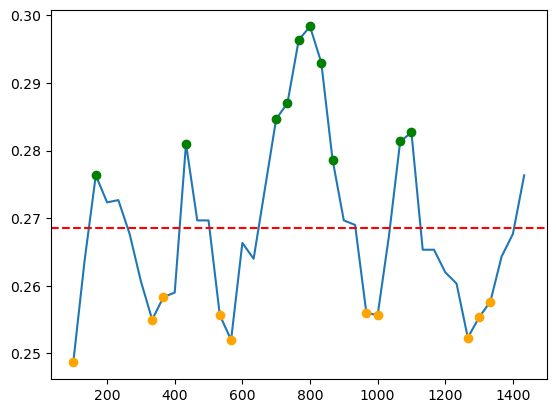

In [41]:
plt.plot (df_novel["percent"], df_novel["MATTR"])
plt.axhline(y = average, color = 'r', linestyle = '--') 
plt.plot(largest["percent"], largest["MATTR"], 'o', color='green')
plt.plot(smallest["percent"], smallest["MATTR"], 'o', color='orange')

In [42]:
nouns_largest = df_novel.nlargest(10, "nouns")
nouns_largest

,window_start,window_end,percent,MATTR,average_word_length,nouns,verbs,adjectives,adverbs,lexical_diversity
20,20000,23000,766.666667,0.296333,3.855000,722,712,190,195,0.606333
21,21000,24000,800.000000,0.298333,3.848333,702,732,209,223,0.622000
10,10000,13000,433.333333,0.281000,3.819000,694,705,215,192,0.602000
9,9000,12000,400.000000,0.259000,3.767000,688,728,218,208,0.614000
22,22000,25000,833.333333,0.293000,3.817333,681,741,212,246,0.626667
8,8000,11000,366.666667,0.258333,3.783000,674,719,247,232,0.624000
4,4000,7000,233.333333,0.272667,3.681333,672,750,217,216,0.618333
15,15000,18000,600.000000,0.266333,3.769333,657,727,232,203,0.606333
19,19000,22000,733.333333,0.287000,3.768000,657,754,174,195,0.593333
38,38000,41000,1366.666667,0.264333,3.789667,657,795,239,202,0.631000


In [43]:
nouns_smallest = df_novel.nsmallest(10, "nouns")
nouns_smallest

,window_start,window_end,percent,MATTR,average_word_length,nouns,verbs,adjectives,adverbs,lexical_diversity
35,35000,38000,1266.666667,0.252333,3.606000,583,748,219,226,0.592000
26,26000,29000,966.666667,0.256000,3.669667,584,731,237,236,0.596000
34,34000,37000,1233.333333,0.260333,3.707000,587,742,208,230,0.589000
1,1000,4000,133.333333,0.263667,3.775667,588,765,240,197,0.596667
27,27000,30000,1000.000000,0.255667,3.728667,594,721,227,235,0.592333
33,33000,36000,1200.000000,0.262000,3.710667,600,761,215,207,0.594333
25,25000,28000,933.333333,0.269000,3.713000,606,736,227,223,0.597333
13,13000,16000,533.333333,0.255667,3.756333,608,734,226,232,0.600000
0,0,3000,100.000000,0.248667,3.720333,613,754,226,198,0.597000
32,32000,35000,1166.666667,0.265333,3.781333,613,765,226,216,0.606667


In [44]:
adjectives_smallest = df_novel.nsmallest(10, "adjectives")
adjectives_largest = df_novel.nlargest(10, "adjectives")

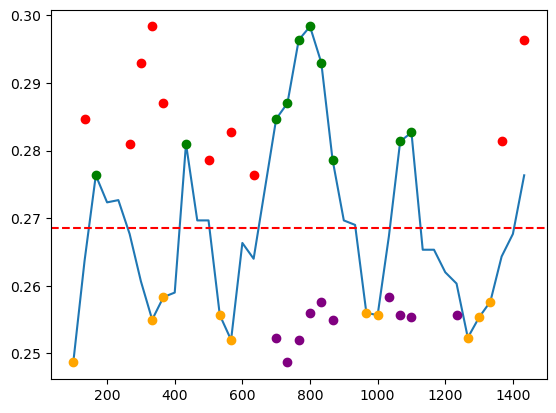

In [45]:
plt.plot (df_novel["percent"], df_novel["MATTR"])
plt.axhline(y = average, color = 'r', linestyle = '--') 
plt.plot(largest["percent"], largest["MATTR"], 'o', color='green')
plt.plot(smallest["percent"], smallest["MATTR"], 'o', color='orange')
#plt.plot(nouns_largest["percent"], largest["MATTR"], 'o', color='lightgreen')
#plt.plot(nouns_smallest["percent"], smallest["MATTR"], 'o', color='yellow')
plt.plot(adjectives_smallest["percent"],smallest["MATTR"], 'o', color='purple')
plt.plot(adjectives_largest["percent"],largest["MATTR"], 'o', color='red')

# <span style='color:Orange'>VI. Sentiment Analysis</span>

In [46]:
def bing_sent(words):

    score = 0
    pos = 0
    neg = 0

    for word in words:
        matching_tuples = [t for t in bing_result_list if t[0] == word]
        if matching_tuples:
            if matching_tuples[0][1] == "negative":
                score -= 1
                neg -= 1
            if matching_tuples[0][1] == "positive":
                score += 1
                pos += 1
    return (pos, neg, score)

In [47]:
def afinn_sent(words):

    afinn_score = 0

    for word in words:
        matching_tuples = [t for t in afinn_result_list if t[0] == word]

        if matching_tuples:
            afinn_score = afinn_score+matching_tuples[0][1]
    return (afinn_score)

In [48]:
def nrc_sent(words):
    
    categories = ["fear", "anger", "trust", "sadness", "disgust", "anticipation", "joy", "surprise", "negative", "positive"]

    nrc_scores = []

    for category in categories:
    
        category_score = 0 
        nrc_result_list = [(row["word"], row["sentiment"]) for index, row in nrc_df[nrc_df["sentiment"] == category].iterrows()]                   
    
        for word in words:
        
            matching_tuples = [t for t in nrc_result_list if t[0] == word]
        
            if matching_tuples:
                category_score += 1
        nrc_scores.append(category_score)
        
    return (nrc_scores)

In [49]:
def segment_sentiments(words, num_segments, lexicon):
    # Calculate the base length of each segment
    base_segment_length = len(words) // num_segments

    # Calculate the number of extra items
    extra_items = len(words) % num_segments

    # Initialize the starting index for each segment
    start_index = 0

    # Initialize the list to store segments
    segments = []
    
    # Initialize the list to store Bing sentiment scores for each segment
    segment_score = []

    # Divide the words into segments
    for _ in range(num_segments):
        # Calculate the ending index for the current segment
        end_index = start_index + base_segment_length + (1 if extra_items > 0 else 0)
        
        # Create a list of the segment words
        seg_words = words[start_index:end_index]

        # Append the current segment to the list of segments
        segments.append(seg_words)
        
        # Calculate the Bing sentiment scores for the section
        if lexicon == "bing":
            pos, neg, score = bing_sent(seg_words)
            # Append the Bing score to a list that records the score for each segment
            segment_score.append((start_index, end_index-1, pos, neg, score, seg_words))
            
        # Calculate the Afinn sentiment score for the section  
        elif lexicon == "afinn":
            afinn_score = afinn_sent(seg_words)
            # Append the Afinn score to a list that records the score for each segment
            segment_score.append((start_index, end_index-1, afinn_score, seg_words))
            
        # Calculate the NRC sentiment scores for the section    
        elif lexicon == "nrc":
            nrc_scores = nrc_sent(seg_words)
            nrc_list = list(nrc_scores)
            nrc_list.append((nrc_list[9]-nrc_list[8]))
            segment_score.append((start_index, end_index-1, *nrc_list))

        # Update the starting index for the next segment
        start_index = end_index
        extra_items -= 1

    return segment_score

In [50]:
afinn_df = pd.read_csv("Afinn.csv", encoding = "latin-1")

In [51]:
bing_df = pd.read_csv("Bing.csv", encoding = "latin-1")

In [52]:
nrc_df = pd.read_csv("NRC.csv", encoding = "latin-1")

## <span style='color:green'>a) Afinn Lexicon</span>

In [53]:
def segment_sentiments_afinn(words, num_segments):
    # Calculate the base length of each segment
    base_segment_length = len(words) // num_segments

    # Calculate the number of extra items
    extra_items = len(words) % num_segments

    # Initialize the starting index for each segment
    start_index = 0

    # Initialize the list to store segments
    segments = []
    
    # Initialize the list to store Bing sentiment scores for each segment
    segment_score = []

    # Divide the words into segments
    for _ in range(num_segments):
        # Calculate the ending index for the current segment
        end_index = start_index + base_segment_length + (1 if extra_items > 0 else 0)
        
        # Create a list of the segment words
        seg_words = words[start_index:end_index]

        # Append the current segment to the list of segments
        segments.append(seg_words)
        
        
        afinn_score = afinn_sent(seg_words)
        afinn_score_more = afinn_sent_more(seg_words)
        # Append the Afinn score to a list that records the score for each segment
        segment_score.append((start_index, end_index-1, afinn_score, afinn_score_more[0], afinn_score_more[1], afinn_score_more[2], afinn_score_more[3], afinn_score_more[4], afinn_score_more[5], afinn_score_more[6], afinn_score_more[7], afinn_score_more[8], afinn_score_more[9], afinn_score_more[10], seg_words))
    

        # Calculate the Afinn sentiment score for the section
        # Update the starting index for the next segment
        start_index = end_index
        extra_items -= 1

    return segment_score

In [54]:
def afinn_sent(words):

    afinn_score = 0

    for word in words:
        matching_tuples = [t for t in afinn_result_list if t[0] == word]

        if matching_tuples:
            afinn_score = afinn_score+matching_tuples[0][1]
    return (afinn_score)

In [55]:
def afinn_sent_more(words):
    #afinn_score = 0
    first_positive_level = 0
    second_positive_level = 0
    third_positive_level = 0
    fourth_positive_level = 0
    fifth_positive_level = 0
    neutral_level = 0
    first_negative_level = 0
    second_negative_level = 0
    third_negative_level = 0
    fourth_negative_level = 0
    fifth_negative_level = 0
    
    for word in words:
        matching_tuples = [t for t in afinn_result_list if t[0] == word]
        
        if matching_tuples:
            #afinn_score = afinn_score+matching_tuples[0][1]
            if matching_tuples[0][1] == 0:
                neutral_level += 1
            elif matching_tuples[0][1] == 1:
                first_positive_level += 1
            elif matching_tuples[0][1] == 2:
                second_positive_level += 1
            elif matching_tuples[0][1] == 3:
                third_positive_level += 1
            elif matching_tuples[0][1] == 4:
                fourth_positive_level += 1
            elif matching_tuples[0][1] == 5:
                fifth_positive_level += 1
            elif matching_tuples[0][1] == -1:
                first_negative_level += 1
            elif matching_tuples[0][1] == -2:
                second_negative_level += 1
            elif matching_tuples[0][1] == -3:
                third_negative_level += 1
            elif matching_tuples[0][1] == -4:
                fourth_negative_level += 1
            elif matching_tuples[0][1] == -5:
                fifth_negative_level += 1
    return first_positive_level, second_positive_level, third_positive_level, fourth_positive_level, fifth_positive_level, neutral_level, first_negative_level, second_negative_level, third_negative_level, fourth_negative_level, fifth_negative_level
    

### <span style='color:violet'>Iterate through the Afinn.csv</span>

In [56]:
afinn_result_list = [(row['word'], row['value']) for index, row in afinn_df.iterrows()]

### <span style='color:violet'>Create dataframe</span>

In [57]:
number = 100

afinn_sent_results_orange = segment_sentiments_afinn(tokens_orange, number)

afinn_sent_orange_df = pd.DataFrame(afinn_sent_results_orange, columns = ["seg_start", "seg_eng", "afinn_score", "pos=1", "pos=2", "pos=3", "pos=4", "pos=5", "neutral", "neg=-1", "neg=-2", "neg=-3", "neg=-4", "neg=-5", "word_list"])

afinn_sent_orange_df

,seg_start,seg_eng,afinn_score,pos=1,pos=2,pos=3,pos=4,pos=5,neutral,neg=-1,neg=-2,neg=-3,neg=-4,neg=-5,word_list
0,0,430,7,5,2,5,0,0,0,4,5,1,0,0,"[part, one, at, christmas, sometimes, the, dev..."
1,431,861,-14,5,1,2,0,0,0,4,5,1,0,2,"[what, s, up, zezé, nothing, i, was, singing, ..."
2,862,1292,11,4,6,3,0,0,0,9,1,1,0,0,"[and, no, one, slapped, him, across, the, it, ..."
3,1293,1723,-2,1,8,1,0,0,0,8,4,2,0,0,"[tree, on, the, other, you, re, such, a, busy,..."
4,1724,2154,8,5,5,1,0,0,0,6,2,0,0,0,"[else, with, first, readers, going, b, plus, a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,40873,41302,16,3,7,5,1,0,0,4,2,4,0,0,"[everywhere, mother, went, back, to, work, the..."
96,41303,41732,17,3,7,5,0,0,0,4,4,1,0,0,"[around, to, show, himself, off, i, m, wearing..."
97,41733,42162,-17,9,2,2,0,0,0,3,9,5,0,0,"[wants, to, kill, you, it, wants, to, kill, yo..."
98,42163,42592,8,9,4,3,0,0,0,8,5,0,0,0,"[we, reached, the, chicken, coop, i, turned, a..."


### <span style='color:violet'>Plot</span>

Text(0, 0.5, 'Segment Sentiment')

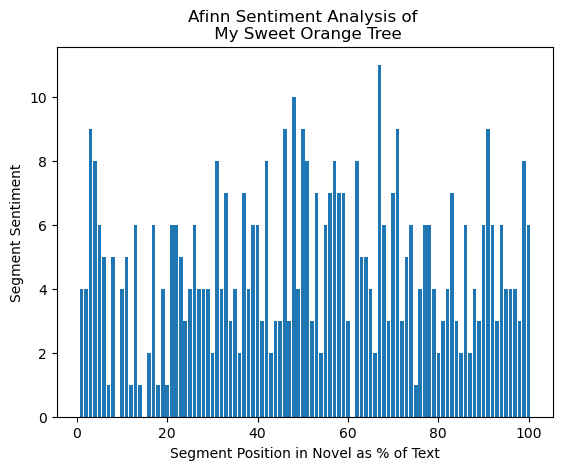

In [58]:
plt.bar(((afinn_sent_orange_df.index+1)/number)*100, afinn_sent_orange_df["neg=-1"])
plt.title("Afinn Sentiment Analysis of \n My Sweet Orange Tree")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")

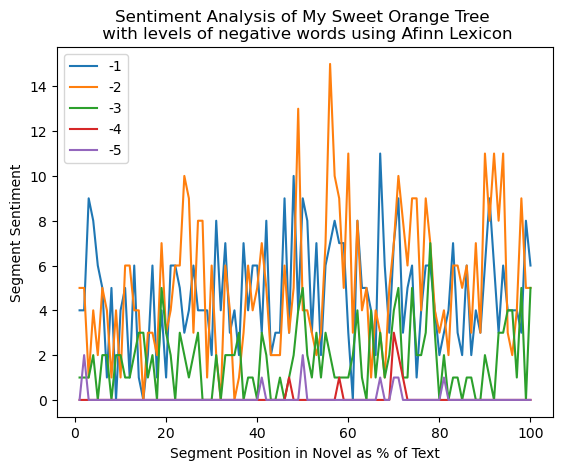

In [59]:
plt.plot(((afinn_sent_orange_df.index+1)/number)*100, afinn_sent_orange_df["neg=-1"], label = "-1")
plt.plot(((afinn_sent_orange_df.index+1)/number)*100, afinn_sent_orange_df["neg=-2"], label = "-2")
plt.plot(((afinn_sent_orange_df.index+1)/number)*100, afinn_sent_orange_df["neg=-3"], label = "-3")
plt.plot(((afinn_sent_orange_df.index+1)/number)*100, afinn_sent_orange_df["neg=-4"], label = "-4")
plt.plot(((afinn_sent_orange_df.index+1)/number)*100, afinn_sent_orange_df["neg=-5"], label = "-5")
plt.title("Sentiment Analysis of My Sweet Orange Tree \n with levels of negative words using Afinn Lexicon")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")
plt.legend()

plt.savefig('line.png', dpi=300, bbox_inches='tight')

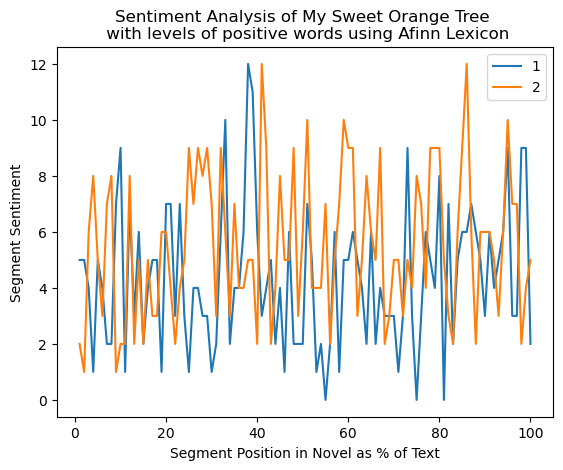

In [60]:
plt.plot(((afinn_sent_orange_df.index+1)/number)*100, afinn_sent_orange_df["pos=1"], label = "1")
plt.plot(((afinn_sent_orange_df.index+1)/number)*100, afinn_sent_orange_df["pos=2"], label = "2")
#plt.plot(((afinn_sent_orange_df.index+1)/number)*100, afinn_sent_orange_df["pos=3"], label = "3")
#plt.plot(((afinn_sent_orange_df.index+1)/number)*100, afinn_sent_orange_df["pos=4"], label = "4")
#plt.plot(((afinn_sent_orange_df.index+1)/number)*100, afinn_sent_orange_df["pos=5"], label = "5")
plt.title("Sentiment Analysis of My Sweet Orange Tree \n with levels of positive words using Afinn Lexicon")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")
plt.legend()

## <span style='color:green'>b) Bing Lexicon</span>

### <span style='color:violet'>Plot</span>

In [61]:
bing_result_list = [(row['word'], row['sentiment']) for index, row in bing_df.iterrows()]

### <span style='color:violet'>Create dataframe</span>

In [62]:
bing_sent_results_orange = segment_sentiments(tokens_orange, number, lexicon="bing")

bing_sent_orange_df = pd.DataFrame(bing_sent_results_orange, columns = ["seg_start", "seg_eng", "positive_score", "negative_score", "overall_seg_score", "word_list"])

bing_sent_orange_df

,seg_start,seg_eng,positive_score,negative_score,overall_seg_score,word_list
0,0,430,6,-14,-8,"[part, one, at, christmas, sometimes, the, dev..."
1,431,861,8,-9,-1,"[what, s, up, zezé, nothing, i, was, singing, ..."
2,862,1292,14,-9,5,"[and, no, one, slapped, him, across, the, it, ..."
3,1293,1723,6,-10,-4,"[tree, on, the, other, you, re, such, a, busy,..."
4,1724,2154,8,-6,2,"[else, with, first, readers, going, b, plus, a..."
...,...,...,...,...,...,...
95,40873,41302,20,-11,9,"[everywhere, mother, went, back, to, work, the..."
96,41303,41732,20,-11,9,"[around, to, show, himself, off, i, m, wearing..."
97,41733,42162,6,-20,-14,"[wants, to, kill, you, it, wants, to, kill, yo..."
98,42163,42592,9,-15,-6,"[we, reached, the, chicken, coop, i, turned, a..."


### <span style='color:violet'>Plot</span>

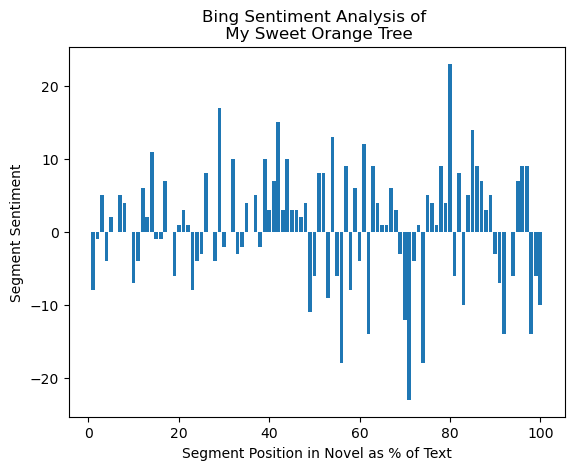

In [63]:
plt.bar(((bing_sent_orange_df.index+1)/number)*100, bing_sent_orange_df["overall_seg_score"])
plt.title("Bing Sentiment Analysis of \n My Sweet Orange Tree")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")
plt.savefig('bar.png', dpi=300, bbox_inches='tight')

### <span style='color:violet'>Smallest and Largest</span>

In [64]:
largest = bing_sent_orange_df.nlargest(10, "overall_seg_score")
largest

,seg_start,seg_eng,positive_score,negative_score,overall_seg_score,word_list
79,33993,34422,27,-4,23,"[in, the, guandu, river, i, don, t, have, a, f..."
28,12063,12492,21,-4,17,"[as, happy, as, the, day, was, hot, when, it, ..."
41,17653,18082,23,-8,15,"[to, cry, in, a, prison, i, hope, you, die, he..."
84,36143,36572,19,-5,14,"[swear, words, again, not, even, bum, i, ll, p..."
53,22813,23242,17,-4,13,"[back, on, a, less, important, car, i, no, lon..."
60,25823,26252,17,-5,12,"[that, pain, i, had, just, discovered, somethi..."
13,5603,6033,19,-8,11,"[had, a, better, horse, never, it, s, lovely, ..."
31,13353,13782,15,-5,10,"[was, pretending, to, be, deaf, back, at, home..."
38,16363,16792,18,-8,10,"[those, who, have, even, tears, were, rolling,..."
43,18513,18942,19,-9,10,"[meant, stevedore, constellation, temptation, ..."


In [65]:
print(bing_sent_orange_df.loc[18].word_list)

['m', 'going', 'to', 'loosen', 'your', 'shoelaces', 'a', 'little', 'and', 'it', 'll', 'feel', 'better', 'we', 'were', 'going', 'slower', 'and', 'slower', 'it', 'felt', 'like', 'we', 'd', 'never', 'get', 'to', 'the', 'market', 'we', 'still', 'had', 'to', 'pass', 'the', 'school', 'and', 'turn', 'right', 'on', 'the', 'street', 'of', 'the', 'bangu', 'casino', 'and', 'the', 'worst', 'part', 'was', 'that', 'time', 'was', 'flying', 'on', 'purpose', 'we', 'arrived', 'dead', 'on', 'our', 'feet', 'there', 'was', 'no', 'one', 'there', 'it', 'didn', 't', 'even', 'look', 'like', 'toys', 'had', 'been', 'given', 'out', 'but', 'they', 'had', 'because', 'the', 'street', 'was', 'littered', 'with', 'crumpled', 'tissue', 'paper', 'torn', 'scraps', 'of', 'coloured', 'paper', 'were', 'strewn', 'across', 'the', 'sand', 'my', 'heart', 'began', 'to', 'race', 'we', 'walked', 'up', 'to', 'the', 'casino', 'and', 'found', 'seu', 'coquinho', 'closing', 'the', 'doors', 'seu', 'coquinho', 'is', 'it', 'all', 'over', '

In [66]:
print(bing_sent_orange_df.loc[47].word_list)

['in', 'peace', 'i', 'was', 'fascinated', 'with', 'the', 'highway', 'a', 'piggyback', 'definitely', 'a', 'piggyback', 'to', 'cling', 'to', 'the', 'back', 'of', 'a', 'car', 'and', 'feel', 'the', 'highway', 'blowing', 'wind', 'in', 'your', 'face', 'whooshing', 'and', 'whistling', 'it', 'was', 'the', 'best', 'thing', 'in', 'the', 'world', 'we', 'all', 'did', 'it', 'totoca', 'had', 'taught', 'me', 'telling', 'me', 'over', 'and', 'over', 'to', 'hold', 'on', 'tight', 'because', 'the', 'cars', 'behind', 'us', 'were', 'dangerous', 'we', 'slowly', 'learned', 'to', 'overcome', 'our', 'fear', 'and', 'our', 'sense', 'of', 'adventure', 'prompted', 'us', 'to', 'attempt', 'even', 'more', 'difficult', 'piggybacks', 'i', 'was', 'getting', 'so', 'bold', 'that', 'i', 'd', 'even', 'piggybacked', 'on', 'seu', 'ladislau', 's', 'car', 'the', 'only', 'one', 'i', 'hadn', 't', 'been', 'on', 'was', 'the', 'portuguese', 's', 'beautiful', 'vehicle', 'what', 'a', 'fine', 'car', 'that', 'was', 'the', 'tyres', 'alway

## <span style='color:green'>c) NRC Lexicon</span>

### <span style='color:violet'>Iterate through the NRC.csv</span>

In [67]:
nrc_sent_results_orange = segment_sentiments(tokens_orange, number, lexicon="nrc")

### <span style='color:violet'>Create dataframe</span>

In [68]:
nrc_sent_orange_df = pd.DataFrame(nrc_sent_results_orange, columns = ["seg_start", "seg_eng", "fear", "anger", "trust", "sadness", "disgust", "anticipation", "joy", "surprise", "negative", "positive", "overall_seg_score"])

nrc_sent_orange_df

,seg_start,seg_eng,fear,anger,trust,sadness,disgust,anticipation,joy,surprise,negative,positive,overall_seg_score
0,0,430,7,6,12,14,4,17,14,3,15,19,4
1,431,861,3,4,11,5,5,6,4,3,10,15,5
2,862,1292,5,9,11,3,3,10,9,7,8,15,7
3,1293,1723,7,7,20,6,4,11,14,7,11,24,13
4,1724,2154,1,0,11,3,3,7,6,3,2,16,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,40873,41302,6,4,12,9,2,10,11,5,13,24,11
96,41303,41732,5,4,11,5,3,3,7,3,10,23,13
97,41733,42162,14,11,8,16,8,7,12,3,23,21,-2
98,42163,42592,12,6,13,9,5,11,11,4,16,16,0


### <span style='color:violet'>Plot</span>

Text(0, 0.5, 'Segment Sentiment')

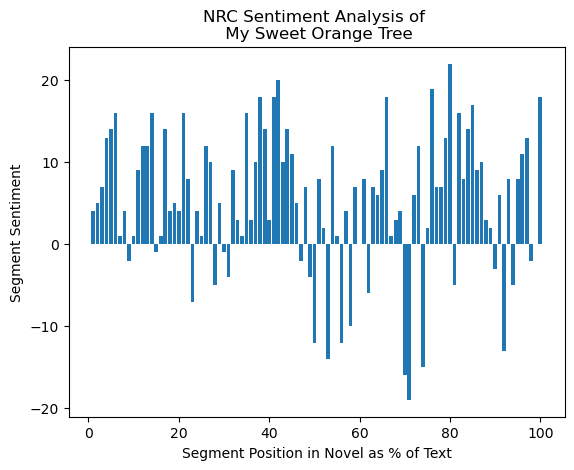

In [69]:
plt.bar(((nrc_sent_orange_df.index+1)/number)*100, nrc_sent_orange_df["overall_seg_score"])
plt.title("NRC Sentiment Analysis of \n My Sweet Orange Tree")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")

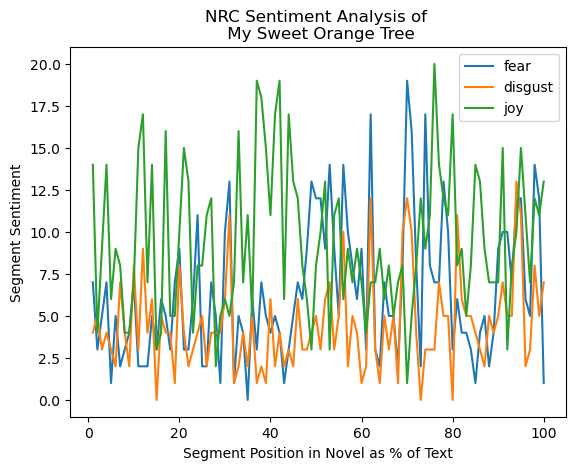

In [70]:
#plt.plot(((nrc_sent_orange_df.index+1)/number)*100, nrc_sent_orange_df["anger"], label = "anger")
plt.plot(((nrc_sent_orange_df.index+1)/number)*100, nrc_sent_orange_df["fear"], label = "fear")
plt.plot(((nrc_sent_orange_df.index+1)/number)*100, nrc_sent_orange_df["disgust"], label = "disgust")
plt.plot(((nrc_sent_orange_df.index+1)/number)*100, nrc_sent_orange_df["joy"], label = "joy")
plt.title("NRC Sentiment Analysis of \n My Sweet Orange Tree")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")
plt.legend()

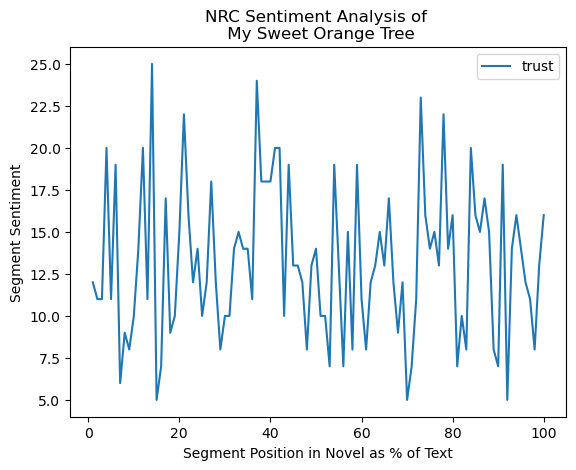

In [71]:
plt.plot(((nrc_sent_orange_df.index+1)/number)*100, nrc_sent_orange_df["trust"], label = "trust")
plt.title("NRC Sentiment Analysis of \n My Sweet Orange Tree")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")
plt.legend()

## <span style='color:green'>d) Three Lexicons</span>

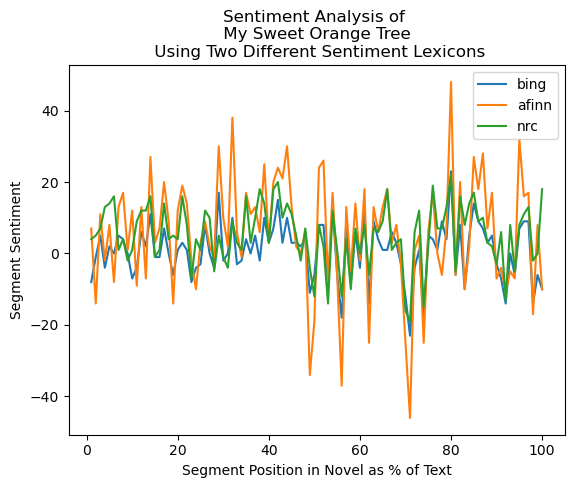

In [72]:
plt.plot(((bing_sent_orange_df.index+1)/number)*100, bing_sent_orange_df["overall_seg_score"], label = "bing")
plt.plot(((afinn_sent_orange_df.index+1)/number)*100, afinn_sent_orange_df["afinn_score"], label = "afinn")
plt.plot(((nrc_sent_orange_df.index+1)/number)*100, nrc_sent_orange_df["overall_seg_score"], label = "nrc")
plt.title("Sentiment Analysis of \n My Sweet Orange Tree \n Using Two Different Sentiment Lexicons")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")
plt.legend()

## <span style='color:green'>e) Smooth Lines</span>

### <span style='color:violet'>Using three lexicons</span>

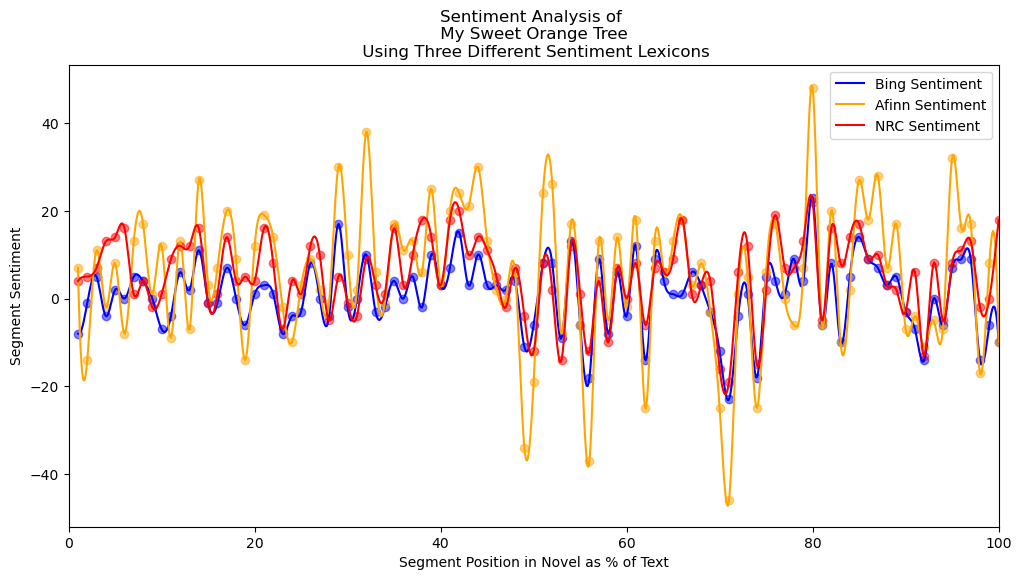

In [73]:
# Create a graph with smoother lines

# Define the number of points for the spline curve
num_points = 1000

# Smooth the bing_sent_twenty_df data
bing_spline = UnivariateSpline(
    ((bing_sent_orange_df.index + 1) / number) * 100,
    bing_sent_orange_df["overall_seg_score"],
    s=0  # You can adjust the smoothing factor 's' based on your preference
)

# Smooth the afinn_sent_twenty_df data
afinn_spline = UnivariateSpline(
    ((afinn_sent_orange_df.index + 1) / number) * 100,
    afinn_sent_orange_df["afinn_score"],
    s=0  # You can adjust the smoothing factor 's' based on your preference
)

# Smooth the nrc_sent_twenty_df data
nrc_spline = UnivariateSpline(
    ((nrc_sent_orange_df.index + 1) / number) * 100,
    nrc_sent_orange_df["overall_seg_score"],
    s=0  # You can adjust the smoothing factor 's' based on your preference
)

# Generate points for the smoothed curves
x_smooth = np.linspace(
    (((bing_sent_orange_df.index + 1) / number) * 100).min(),
    (((bing_sent_orange_df.index + 1) / number) * 100).max(),
    num=num_points
)

# Set the figure size to stretch the x-axis visually
plt.figure(figsize=(12, 6))  # Adjust width and height as needed

# Plot the smoothed curves
plt.plot(x_smooth, bing_spline(x_smooth), label="Bing Sentiment", color="blue")
plt.plot(x_smooth, afinn_spline(x_smooth), label="Afinn Sentiment", color="orange")
plt.plot(x_smooth, nrc_spline(x_smooth), label="NRC Sentiment", color="red")

# Original data points
plt.scatter(
    ((bing_sent_orange_df.index + 1) / number) * 100,
    bing_sent_orange_df["overall_seg_score"],
    marker="o",
    color="blue",
    alpha=0.5
)
plt.scatter(
    ((afinn_sent_orange_df.index + 1) / number) * 100,
    afinn_sent_orange_df["afinn_score"],
    marker="o",
    color="orange",
    alpha=0.5
)
plt.scatter(
    ((nrc_sent_orange_df.index + 1) / number) * 100,
    nrc_sent_orange_df["overall_seg_score"],
    marker="o",
    color="red",
    alpha=0.5
)


# Set title and labels
plt.title("Sentiment Analysis of \n My Sweet Orange Tree \n Using Three Different Sentiment Lexicons")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")
plt.legend()


# Stretch the x-axis
plt.xlim(0, 100)  # Replace x_min_value and x_max_value with your desired range

# Show the plot
plt.show()

### <span style='color:violet'>For a specific word using NRC Lexicon</span>

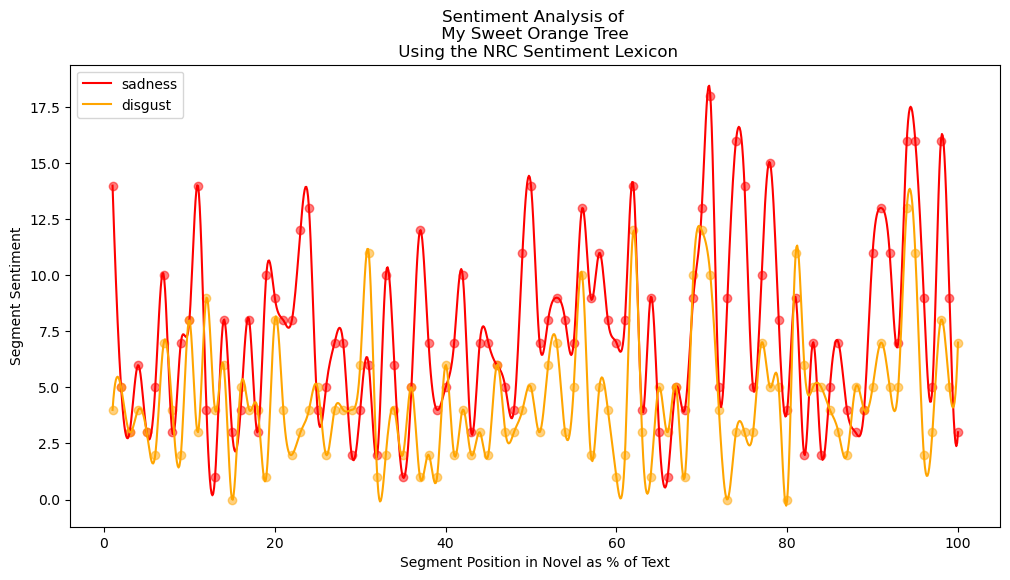

In [74]:
# Create a graph with smoother lines

# Define the number of points for the spline curve
num_points = 1000

# Smooth the nrc_sent_twenty_df data for a specific emotion
nrc_spline_anger = UnivariateSpline(
    ((nrc_sent_orange_df.index + 1) / number) * 100,
    nrc_sent_orange_df["sadness"],
    s=0,  # You can adjust the smoothing factor 's' based on your preference
)

# Smooth the nrc_sent_twenty_df data for a specific emotion
nrc_spline_fear = UnivariateSpline(
    ((nrc_sent_orange_df.index + 1) / number) * 100,
    nrc_sent_orange_df["disgust"],
    s=0,  # You can adjust the smoothing factor 's' based on your preference
)

# Generate points for the smoothed curves
x_smooth = np.linspace(
    (((nrc_sent_orange_df.index + 1) / number) * 100).min(),
    (((nrc_sent_orange_df.index + 1) / number) * 100).max(),
    num=num_points
)

# Set the figure size to stretch the x-axis visually
plt.figure(figsize=(12, 6))  # Adjust width and height as needed

# Plot the smoothed curves
plt.plot(x_smooth, nrc_spline_anger(x_smooth), label="sadness", color="red")
plt.plot(x_smooth, nrc_spline_fear(x_smooth), label="disgust", color="orange")

# Original data points
plt.scatter(
    ((nrc_sent_orange_df.index + 1) / number) * 100,
    nrc_sent_orange_df["sadness"],
    marker="o",
    color="red",
    alpha=0.5,
)

plt.scatter(
    ((nrc_sent_orange_df.index + 1) / number) * 100,
    nrc_sent_orange_df["disgust"],
    marker="o",
    color="orange",
    alpha=0.5,
)

# Set title and labels
plt.title("Sentiment Analysis of \n My Sweet Orange Tree \n Using the NRC Sentiment Lexicon")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")
plt.legend()

# Show the plot
plt.show()

### *<span style='color:red'>Father and occurences of negative words</span>*

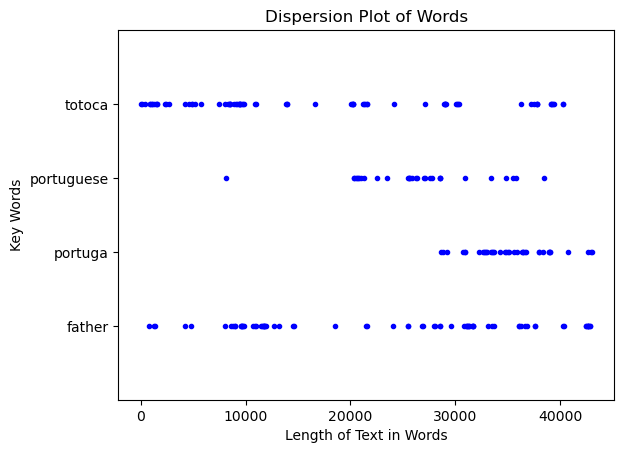

In [75]:
custom_dispersion(novel,["father","portuga","portuguese", "totoca"]) 


In [76]:
nrc_sent_results_orange_1 = segment_sentiments(tokens_orange[8000:23000], number, lexicon="nrc")
nrc_sent_orange_df_1 = pd.DataFrame(nrc_sent_results_orange_1, columns = ["seg_start", "seg_eng", "fear", "anger", "trust", "sadness", "disgust", "anticipation", "joy", "surprise", "negative", "positive", "overall_seg_score"])
nrc_sent_orange_df_1

,seg_start,seg_eng,fear,anger,trust,sadness,disgust,anticipation,joy,surprise,negative,positive,overall_seg_score
0,0,149,3,0,5,4,0,2,3,0,4,10,6
1,150,299,7,4,8,8,3,5,4,4,13,11,-2
2,300,449,1,0,3,0,0,1,2,2,1,4,3
3,450,599,2,4,7,3,3,1,4,1,4,8,4
4,600,749,3,5,8,4,5,6,3,3,5,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14250,14399,3,1,5,1,2,3,4,3,5,7,2
96,14400,14549,5,7,4,3,3,1,0,4,9,2,-7
97,14550,14699,5,4,0,3,3,1,1,1,10,2,-8
98,14700,14849,5,2,3,4,2,2,3,1,6,7,1


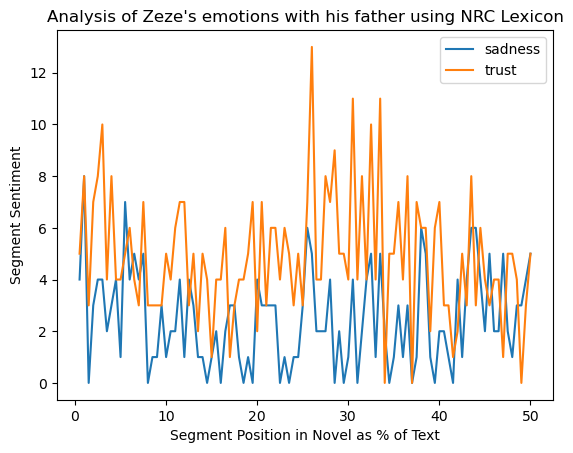

In [77]:
#plt.plot(((nrc_sent_orange_df_1.index+1)/number)*50, nrc_sent_orange_df_1["fear"], label = "fear")
plt.plot(((nrc_sent_orange_df_1.index+1)/number)*50, nrc_sent_orange_df_1["sadness"], label = "sadness")
#plt.plot(((nrc_sent_orange_df_1.index+1)/number)*50, nrc_sent_orange_df_1["disgust"], label = "disgust")
#plt.plot(((nrc_sent_orange_df_1.index+1)/number)*50, nrc_sent_orange_df_1["anger"], label = "anger")
#plt.plot(((nrc_sent_orange_df_1.index+1)/number)*50, nrc_sent_orange_df_1["joy"], label = "joy")
plt.plot(((nrc_sent_orange_df_1.index+1)/number)*50, nrc_sent_orange_df_1["trust"], label = "trust")
#plt.plot(((nrc_sent_orange_df_1.index+1)/number)*50, nrc_sent_orange_df_1["anticipation"], label = "anticipation")
#plt.plot(((nrc_sent_orange_df_1.index+1)/number)*50, nrc_sent_orange_df_1["surprise"], label = "surprise")
plt.title("Analysis of Zeze's emotions with his father using NRC Lexicon")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")
plt.legend()

plt.savefig('line_NRC_father.png', dpi=300, bbox_inches='tight')
#Even though having negative attachment with his father, his lexical diversity tends to be more skewed towards positive words.

In [78]:
nrc_sent_results_orange_2 = segment_sentiments(tokens_orange[8000:23000], number, lexicon="nrc")
nrc_sent_orange_df_2 = pd.DataFrame(nrc_sent_results_orange_2, columns = ["seg_start", "seg_eng", "fear", "anger", "trust", "sadness", "disgust", "anticipation", "joy", "surprise", "negative", "positive", "overall_seg_score"])
nrc_sent_orange_df_2

,seg_start,seg_eng,fear,anger,trust,sadness,disgust,anticipation,joy,surprise,negative,positive,overall_seg_score
0,0,149,3,0,5,4,0,2,3,0,4,10,6
1,150,299,7,4,8,8,3,5,4,4,13,11,-2
2,300,449,1,0,3,0,0,1,2,2,1,4,3
3,450,599,2,4,7,3,3,1,4,1,4,8,4
4,600,749,3,5,8,4,5,6,3,3,5,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14250,14399,3,1,5,1,2,3,4,3,5,7,2
96,14400,14549,5,7,4,3,3,1,0,4,9,2,-7
97,14550,14699,5,4,0,3,3,1,1,1,10,2,-8
98,14700,14849,5,2,3,4,2,2,3,1,6,7,1


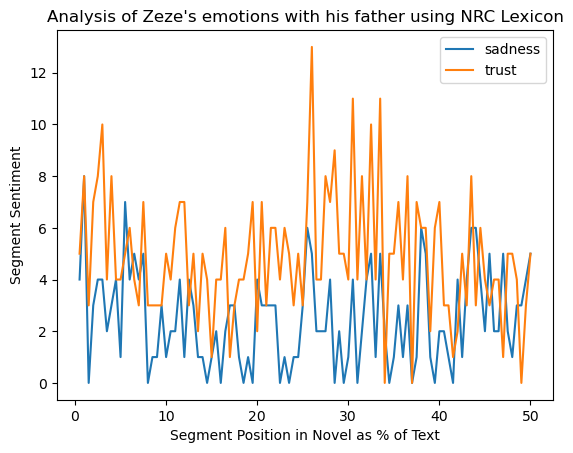

In [79]:
#plt.plot(((nrc_sent_orange_df_2.index+1)/number)*50, nrc_sent_orange_df_2["fear"], label = "fear")
plt.plot(((nrc_sent_orange_df_2.index+1)/number)*50, nrc_sent_orange_df_2["sadness"], label = "sadness")
#plt.plot(((nrc_sent_orange_df_2.index+1)/number)*50, nrc_sent_orange_df_2["joy"], label = "joy")
plt.plot(((nrc_sent_orange_df_2.index+1)/number)*50, nrc_sent_orange_df_2["trust"], label = "trust")
plt.title("Analysis of Zeze's emotions with his father using NRC Lexicon")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")
plt.legend()

#plt.savefig('plot_NRC_sadness_trust_2.png', dpi=300, bbox_inches='tight')

In [80]:
bing_sent_results_orange_1 = segment_sentiments(tokens_orange[8000:23000], number, lexicon="bing")

bing_sent_orange_df_1 = pd.DataFrame(bing_sent_results_orange_1, columns = ["seg_start", "seg_eng", "positive_score", "negative_score", "overall_seg_score", "word_list"])

bing_sent_orange_df_1

,seg_start,seg_eng,positive_score,negative_score,overall_seg_score,word_list
0,0,149,5,-3,2,"[understood, the, tragedy, he, didn, t, even, ..."
1,150,299,9,-8,1,"[don, t, cry, cause, kings, don, t, my, chest,..."
2,300,449,1,-1,0,"[that, s, totoca, have, you, been, to, the, ne..."
3,450,599,2,-4,-2,"[a, moment, and, looked, at, me, half, laughin..."
4,600,749,3,-7,-4,"[bad, it, s, just, that, you, ve, got, the, de..."
...,...,...,...,...,...,...
95,14250,14399,6,-4,2,"[all, beautiful, the, world, belonged, to, the..."
96,14400,14549,0,-5,-5,"[wanted, to, come, this, time, and, richard, t..."
97,14550,14699,0,-4,-4,"[earlier, to, avoid, running, into, the, portu..."
98,14700,14849,6,-6,0,"[seu, paulo, s, boy, sometimes, i, d, see, the..."


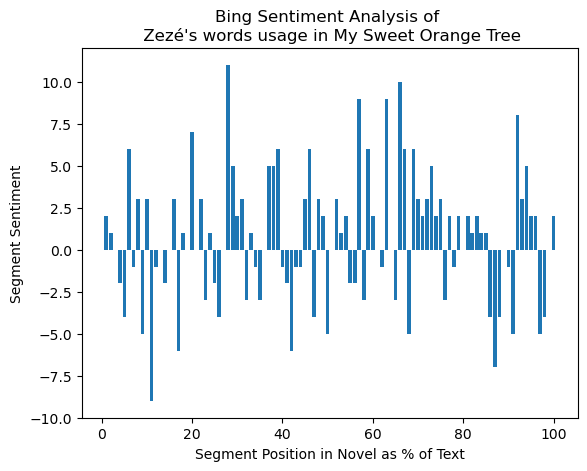

In [81]:
plt.bar(((bing_sent_orange_df_1.index+1)/number)*100, bing_sent_orange_df_1["overall_seg_score"])
plt.title("Bing Sentiment Analysis of \n Zezé's words usage in My Sweet Orange Tree")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")

plt.savefig('plot_bing_general.png', dpi=300, bbox_inches='tight')

In [82]:
number = 100

afinn_sent_results_orange_1 = segment_sentiments_afinn(tokens_orange[8000:23000], number)

afinn_sent_orange_df_1 = pd.DataFrame(afinn_sent_results_orange_1, columns = ["seg_start", "seg_eng", "afinn_score", "pos=1", "pos=2", "pos=3", "pos=4", "pos=5", "neutral", "neg=-1", "neg=-2", "neg=-3", "neg=-4", "neg=-5", "word_list"])

afinn_sent_orange_df_1

,seg_start,seg_eng,afinn_score,pos=1,pos=2,pos=3,pos=4,pos=5,neutral,neg=-1,neg=-2,neg=-3,neg=-4,neg=-5,word_list
0,0,149,4,1,2,2,0,0,0,2,1,1,0,0,"[understood, the, tragedy, he, didn, t, even, ..."
1,150,299,0,1,6,1,0,0,0,1,6,1,0,0,"[don, t, cry, cause, kings, don, t, my, chest,..."
2,300,449,5,3,0,1,0,0,0,1,0,0,0,0,"[that, s, totoca, have, you, been, to, the, ne..."
3,450,599,-1,2,0,1,0,0,0,0,0,2,0,0,"[a, moment, and, looked, at, me, half, laughin..."
4,600,749,0,2,1,1,0,0,0,2,1,1,0,0,"[bad, it, s, just, that, you, ve, got, the, de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14250,14399,6,1,1,2,0,0,0,0,0,1,0,0,"[all, beautiful, the, world, belonged, to, the..."
96,14400,14549,-3,1,0,0,0,0,0,2,1,0,0,0,"[wanted, to, come, this, time, and, richard, t..."
97,14550,14699,-4,0,2,0,0,0,0,3,1,1,0,0,"[earlier, to, avoid, running, into, the, portu..."
98,14700,14849,-3,0,3,1,0,0,0,3,0,3,0,0,"[seu, paulo, s, boy, sometimes, i, d, see, the..."


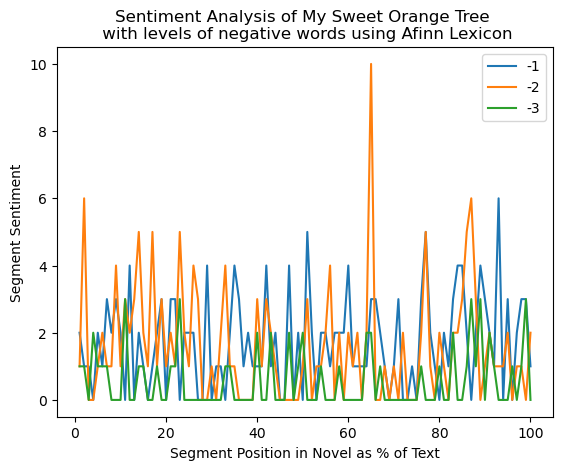

In [83]:
plt.plot(((afinn_sent_orange_df_1.index+1)/number)*100, afinn_sent_orange_df_1["neg=-1"], label = "-1")
plt.plot(((afinn_sent_orange_df_1.index+1)/number)*100, afinn_sent_orange_df_1["neg=-2"], label = "-2")
plt.plot(((afinn_sent_orange_df_1.index+1)/number)*100, afinn_sent_orange_df_1["neg=-3"], label = "-3")
#plt.plot(((afinn_sent_orange_df_1.index+1)/number)*100, afinn_sent_orange_df_1["pos=2"], label = "2")
#plt.plot(((afinn_sent_orange_df_1.index+1)/number)*100, afinn_sent_orange_df_1["neg=-5"], label = "-5")
plt.title("Sentiment Analysis of My Sweet Orange Tree \n with levels of negative words using Afinn Lexicon")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")
plt.legend()

plt.savefig('plot_afinn_father.png', dpi=300, bbox_inches='tight')

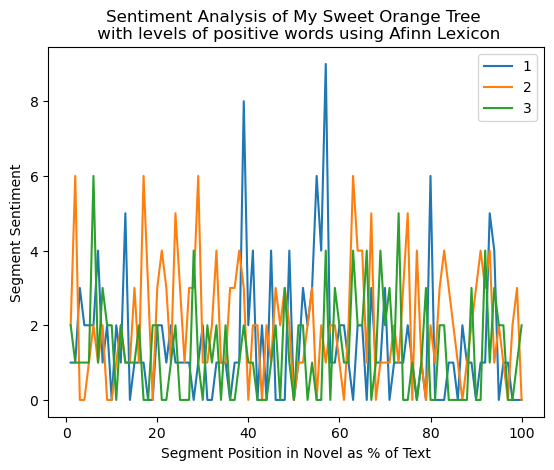

In [84]:
plt.plot(((afinn_sent_orange_df_1.index+1)/number)*100, afinn_sent_orange_df_1["pos=1"], label = "1")
plt.plot(((afinn_sent_orange_df_1.index+1)/number)*100, afinn_sent_orange_df_1["pos=2"], label = "2")
plt.plot(((afinn_sent_orange_df_1.index+1)/number)*100, afinn_sent_orange_df_1["pos=3"], label = "3")
#plt.plot(((afinn_sent_orange_df_2.index+1)/number)*100, afinn_sent_orange_df_2["pos=4"], label = "4")
#plt.plot(((afinn_sent_orange_df_2.index+1)/number)*100, afinn_sent_orange_df_2["pos=5"], label = "5")
plt.title("Sentiment Analysis of My Sweet Orange Tree \n with levels of positive words using Afinn Lexicon")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")
plt.legend()

### *<span style='color:red'>Portuga and occurences of negative words</span>*

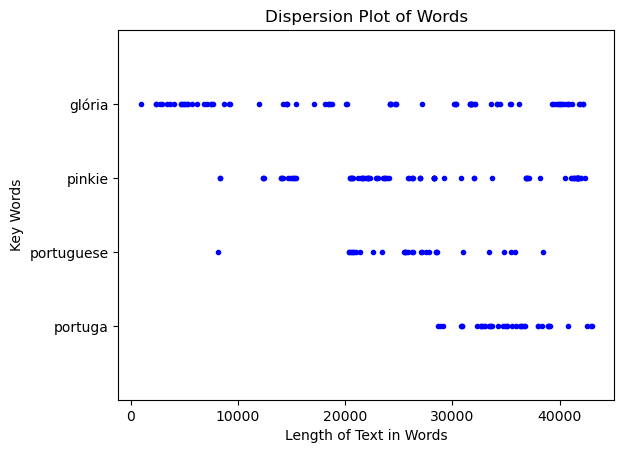

In [85]:
custom_dispersion(novel,["portuga", "portuguese", "pinkie", "glória"])

In [86]:
nrc_sent_results_orange_2 = segment_sentiments(tokens_orange[23000:38000], number, lexicon="nrc")
nrc_sent_orange_df_2 = pd.DataFrame(nrc_sent_results_orange_2, columns = ["seg_start", "seg_eng", "fear", "anger", "trust", "sadness", "disgust", "anticipation", "joy", "surprise", "negative", "positive", "overall_seg_score"])
nrc_sent_orange_df_2

,seg_start,seg_eng,fear,anger,trust,sadness,disgust,anticipation,joy,surprise,negative,positive,overall_seg_score
0,0,149,2,1,8,2,0,5,5,3,1,8,7
1,150,299,1,1,8,1,2,6,5,2,4,9,5
2,300,449,1,3,6,4,2,4,5,5,5,6,1
3,450,599,2,1,2,1,1,2,2,0,7,3,-4
4,600,749,3,1,3,2,0,0,3,1,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14250,14399,4,3,4,4,1,3,2,4,8,6,-2
96,14400,14549,0,1,5,0,1,2,3,2,2,6,4
97,14550,14699,1,0,8,1,0,4,2,2,4,5,1
98,14700,14849,1,3,3,2,4,2,1,1,6,3,-3


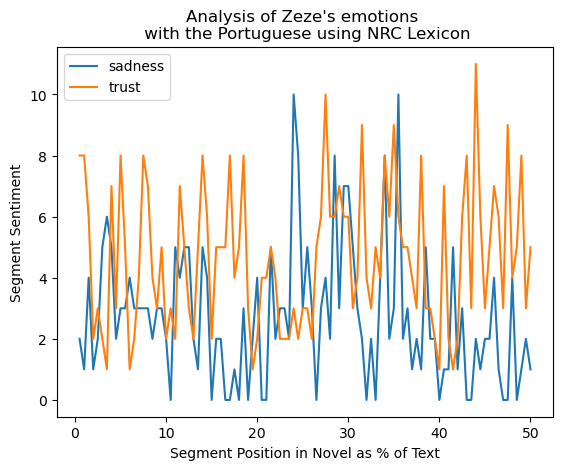

In [87]:
#plt.plot(((nrc_sent_orange_df_2.index+1)/number)*50, nrc_sent_orange_df_2["fear"], label = "fear")
plt.plot(((nrc_sent_orange_df_2.index+1)/number)*50, nrc_sent_orange_df_2["sadness"], label = "sadness")
#plt.plot(((nrc_sent_orange_df_2.index+1)/number)*50, nrc_sent_orange_df_2["joy"], label = "joy")
plt.plot(((nrc_sent_orange_df_2.index+1)/number)*50, nrc_sent_orange_df_2["trust"], label = "trust")
plt.title("Analysis of Zeze's emotions \n with the Portuguese using NRC Lexicon")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")
plt.legend()

plt.savefig('plot_NRC_portuga_1.png', dpi=300, bbox_inches='tight')

In [88]:
bing_sent_results_orange_2 = segment_sentiments(tokens_orange[23000:38000], number, lexicon="bing")

bing_sent_orange_df_2 = pd.DataFrame(bing_sent_results_orange_2, columns = ["seg_start", "seg_eng", "positive_score", "negative_score", "overall_seg_score", "word_list"])

bing_sent_orange_df_2

,seg_start,seg_eng,positive_score,negative_score,overall_seg_score,word_list
0,0,149,9,0,9,"[first, so, i, d, fetch, bits, of, rope, scrap..."
1,150,299,4,-1,3,"[more, beautifully, than, when, i, sang, with,..."
2,300,449,5,-7,-2,"[believe, it, she, didn, t, believe, that, i, ..."
3,450,599,3,-8,-5,"[the, horn, three, times, and, i, saw, that, t..."
4,600,749,2,-4,-2,"[his, saddle, now, there, now, we, can, talk, ..."
...,...,...,...,...,...,...
95,14250,14399,5,-4,1,"[this, about, not, well, keep, it, to, yoursel..."
96,14400,14549,4,-1,3,"[of, nean, i, don, t, know, i, can, t, remembe..."
97,14550,14699,4,-2,2,"[what, else, you, know, zezé, we, re, not, goi..."
98,14700,14849,3,-5,-2,"[in, all, the, ditches, and, take, space, from..."


Text(0, 0.5, 'Segment Sentiment')

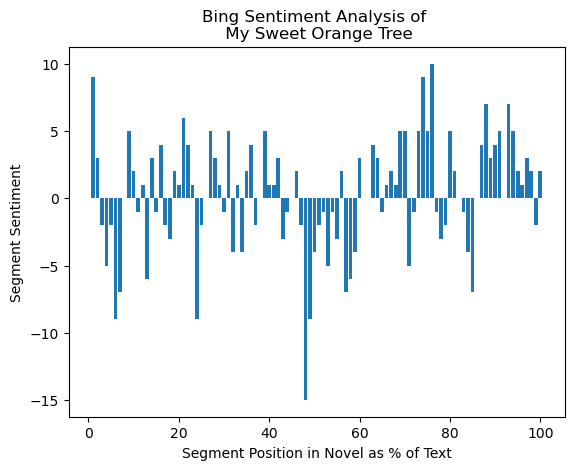

In [89]:
plt.bar(((bing_sent_orange_df_2.index+1)/number)*100, bing_sent_orange_df_2["overall_seg_score"])
plt.title("Bing Sentiment Analysis of \n My Sweet Orange Tree")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")

In [90]:
number = 100

afinn_sent_results_orange_2 = segment_sentiments_afinn(tokens_orange[23000:38000], number)

afinn_sent_orange_df_2 = pd.DataFrame(afinn_sent_results_orange_2, columns = ["seg_start", "seg_eng", "afinn_score", "pos=1", "pos=2", "pos=3", "pos=4", "pos=5", "neutral", "neg=-1", "neg=-2", "neg=-3", "neg=-4", "neg=-5", "word_list"])

afinn_sent_orange_df_2

,seg_start,seg_eng,afinn_score,pos=1,pos=2,pos=3,pos=4,pos=5,neutral,neg=-1,neg=-2,neg=-3,neg=-4,neg=-5,word_list
0,0,149,12,2,3,2,0,0,0,0,1,0,0,0,"[first, so, i, d, fetch, bits, of, rope, scrap..."
1,150,299,8,0,1,3,0,0,0,0,0,1,0,0,"[more, beautifully, than, when, i, sang, with,..."
2,300,449,-4,0,2,1,0,0,0,3,4,0,0,0,"[believe, it, she, didn, t, believe, that, i, ..."
3,450,599,-3,0,3,1,0,0,0,2,2,2,0,0,"[the, horn, three, times, and, i, saw, that, t..."
4,600,749,-10,0,1,0,0,0,0,1,4,1,0,0,"[his, saddle, now, there, now, we, can, talk, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14250,14399,13,2,0,3,1,0,0,2,0,0,0,0,"[this, about, not, well, keep, it, to, yoursel..."
96,14400,14549,5,1,0,2,0,0,0,0,1,0,0,0,"[of, nean, i, don, t, know, i, can, t, remembe..."
97,14550,14699,3,2,1,2,0,0,0,1,3,0,0,0,"[what, else, you, know, zezé, we, re, not, goi..."
98,14700,14849,-1,3,1,1,0,0,0,3,3,0,0,0,"[in, all, the, ditches, and, take, space, from..."


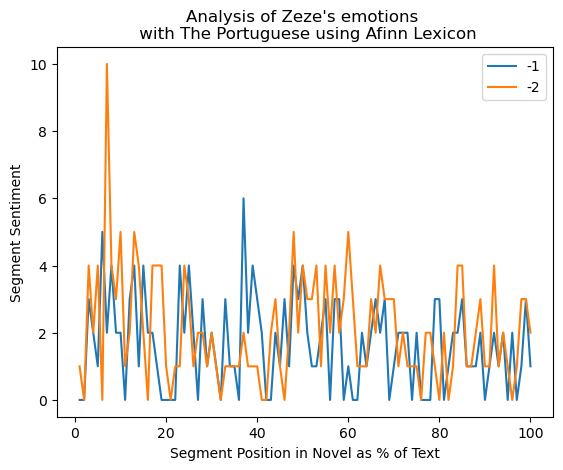

In [91]:
plt.plot(((afinn_sent_orange_df_2.index+1)/number)*100, afinn_sent_orange_df_2["neg=-1"], label = "-1")
plt.plot(((afinn_sent_orange_df_2.index+1)/number)*100, afinn_sent_orange_df_2["neg=-2"], label = "-2")
#plt.plot(((afinn_sent_orange_df_2.index+1)/number)*100, afinn_sent_orange_df_2["neg=-3"], label = "-3")
#plt.plot(((afinn_sent_orange_df_2.index+1)/number)*100, afinn_sent_orange_df_2["pos=2"], label = "2")
#plt.plot(((afinn_sent_orange_df_2.index+1)/number)*100, afinn_sent_orange_df_2["neg=-4"], label = "-4")
#plt.plot(((afinn_sent_orange_df_2.index+1)/number)*100, afinn_sent_orange_df_2["neg=-5"], label = "-5")
plt.title("Analysis of Zeze's emotions \n with The Portuguese using Afinn Lexicon")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")
plt.legend()

plt.savefig('plot_Afinn_portuga_1.png', dpi=300, bbox_inches='tight')

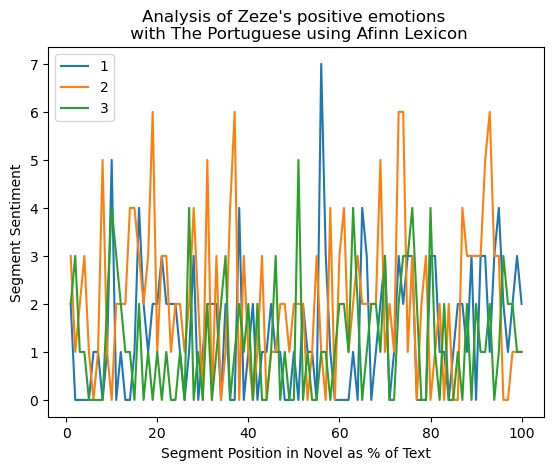

In [92]:
plt.plot(((afinn_sent_orange_df_2.index+1)/number)*100, afinn_sent_orange_df_2["pos=1"], label = "1")
plt.plot(((afinn_sent_orange_df_2.index+1)/number)*100, afinn_sent_orange_df_2["pos=2"], label = "2")
plt.plot(((afinn_sent_orange_df_2.index+1)/number)*100, afinn_sent_orange_df_2["pos=3"], label = "3")
#plt.plot(((afinn_sent_orange_df_2.index+1)/number)*100, afinn_sent_orange_df_2["pos=4"], label = "4")
#plt.plot(((afinn_sent_orange_df_2.index+1)/number)*100, afinn_sent_orange_df_2["pos=5"], label = "5")
plt.title("Analysis of Zeze's positive emotions \n with The Portuguese using Afinn Lexicon")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")
plt.legend()

plt.savefig('plot_Afinn_portuga.png', dpi=300, bbox_inches='tight')

### *<span style='color:red'>Totoca and occurences of negative words</span>*

In [93]:
nrc_sent_results_orange_3 = segment_sentiments(tokens_orange[0:8000], number, lexicon="nrc")
nrc_sent_orange_df_3 = pd.DataFrame(nrc_sent_results_orange_3, columns = ["seg_start", "seg_eng", "fear", "anger", "trust", "sadness", "disgust", "anticipation", "joy", "surprise", "negative", "positive", "overall_seg_score"])
nrc_sent_orange_df_3

,seg_start,seg_eng,fear,anger,trust,sadness,disgust,anticipation,joy,surprise,negative,positive,overall_seg_score
0,0,79,1,1,2,1,1,4,2,0,1,3,2
1,80,159,3,3,3,4,2,5,3,0,4,3,-1
2,160,239,0,0,3,3,1,3,3,1,3,4,1
3,240,319,0,1,2,1,0,2,2,1,2,3,1
4,320,399,3,1,1,4,0,3,4,1,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7600,7679,1,0,1,1,1,1,0,0,2,1,-1
96,7680,7759,1,0,2,1,2,4,2,1,2,3,1
97,7760,7839,1,0,1,0,0,1,0,0,0,1,1
98,7840,7919,0,0,1,1,0,0,1,0,2,1,-1


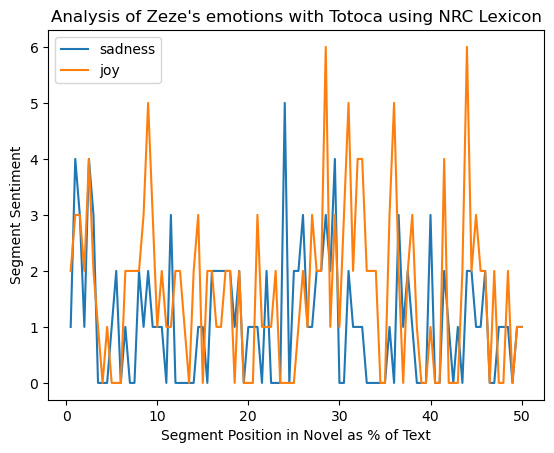

In [94]:
#plt.plot(((nrc_sent_orange_df_3.index+1)/number)*50, nrc_sent_orange_df_3["fear"], label = "fear")
plt.plot(((nrc_sent_orange_df_3.index+1)/number)*50, nrc_sent_orange_df_3["sadness"], label = "sadness")
plt.plot(((nrc_sent_orange_df_3.index+1)/number)*50, nrc_sent_orange_df_3["joy"], label = "joy")
#plt.plot(((nrc_sent_orange_df_3.index+1)/number)*50, nrc_sent_orange_df_3["trust"], label = "trust")
plt.title("Analysis of Zeze's emotions with Totoca using NRC Lexicon")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")
plt.legend()

plt.savefig('plot_NRC_totoca.png', dpi=300, bbox_inches='tight')

In [95]:
bing_sent_results_orange_3 = segment_sentiments(tokens_orange[0:8000], number, lexicon="bing")

bing_sent_orange_df_3 = pd.DataFrame(bing_sent_results_orange_3, columns = ["seg_start", "seg_eng", "positive_score", "negative_score", "overall_seg_score", "word_list"])

bing_sent_orange_df_3

,seg_start,seg_eng,positive_score,negative_score,overall_seg_score,word_list
0,0,79,1,-1,0,"[part, one, at, christmas, sometimes, the, dev..."
1,80,159,1,-5,-4,"[mistakes, and, because, i, made, mistakes, i,..."
2,160,239,1,-1,0,"[copy, him, nothing, came, out, he, cheered, m..."
3,240,319,0,0,0,"[the, sun, off, it, with, an, apron, around, h..."
4,320,399,3,-5,-2,"[and, thin, but, very, beautiful, she, was, br..."
...,...,...,...,...,...,...
95,7600,7679,2,-3,-1,"[the, bundle, of, letters, and, papers, under,..."
96,7680,7759,0,0,0,"[carry, you, a, ways, ok, he, stretched, out, ..."
97,7760,7839,4,-4,0,"[to, loosen, your, shoelaces, a, little, and, ..."
98,7840,7919,1,-2,-1,"[because, the, street, was, littered, with, cr..."


Text(0, 0.5, 'Segment Sentiment')

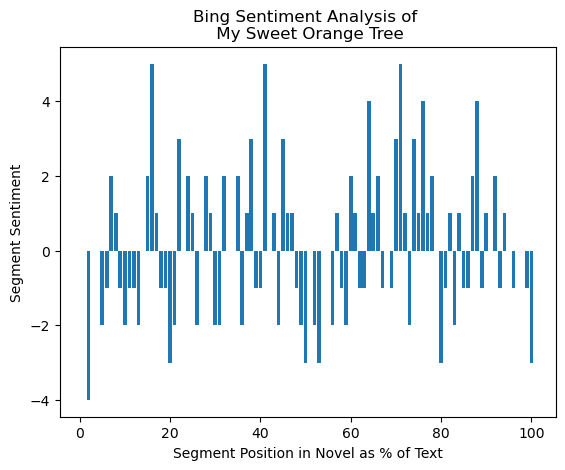

In [96]:
plt.bar(((bing_sent_orange_df_3.index+1)/number)*100, bing_sent_orange_df_3["overall_seg_score"])
plt.title("Bing Sentiment Analysis of \n My Sweet Orange Tree")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")

In [97]:
number = 100

afinn_sent_results_orange_3 = segment_sentiments_afinn(tokens_orange[0:8000], number)

afinn_sent_orange_df_3 = pd.DataFrame(afinn_sent_results_orange_3, columns = ["seg_start", "seg_eng", "afinn_score", "pos=1", "pos=2", "pos=3", "pos=4", "pos=5", "neutral", "neg=-1", "neg=-2", "neg=-3", "neg=-4", "neg=-5", "word_list"])

afinn_sent_orange_df_3

,seg_start,seg_eng,afinn_score,pos=1,pos=2,pos=3,pos=4,pos=5,neutral,neg=-1,neg=-2,neg=-3,neg=-4,neg=-5,word_list
0,0,79,3,1,0,1,0,0,0,1,0,0,0,0,"[part, one, at, christmas, sometimes, the, dev..."
1,80,159,-6,3,0,0,0,0,0,3,3,0,0,0,"[mistakes, and, because, i, made, mistakes, i,..."
2,160,239,3,0,1,1,0,0,0,0,1,0,0,0,"[copy, him, nothing, came, out, he, cheered, m..."
3,240,319,2,0,1,0,0,0,0,0,0,0,0,0,"[the, sun, off, it, with, an, apron, around, h..."
4,320,399,5,1,0,3,0,0,0,0,1,1,0,0,"[and, thin, but, very, beautiful, she, was, br..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7600,7679,-1,1,0,0,0,0,0,0,1,0,0,0,"[the, bundle, of, letters, and, papers, under,..."
96,7680,7759,3,1,1,0,0,0,0,0,0,0,0,0,"[carry, you, a, ways, ok, he, stretched, out, ..."
97,7760,7839,-1,0,3,0,0,0,0,1,0,2,0,0,"[to, loosen, your, shoelaces, a, little, and, ..."
98,7840,7919,0,0,1,0,0,0,0,0,1,0,0,0,"[because, the, street, was, littered, with, cr..."


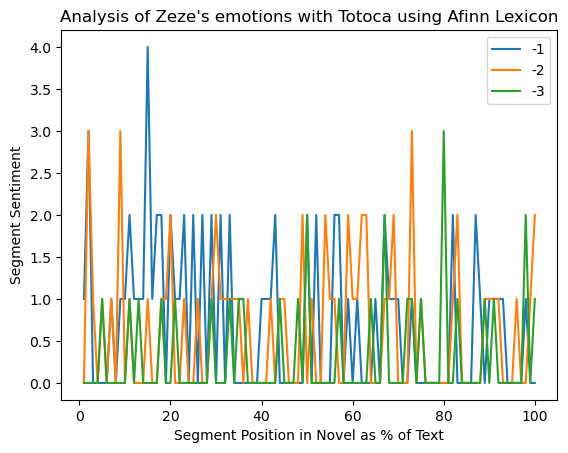

In [98]:
plt.plot(((afinn_sent_orange_df_3.index+1)/number)*100, afinn_sent_orange_df_3["neg=-1"], label = "-1")
plt.plot(((afinn_sent_orange_df_3.index+1)/number)*100, afinn_sent_orange_df_3["neg=-2"], label = "-2")
plt.plot(((afinn_sent_orange_df_3.index+1)/number)*100, afinn_sent_orange_df_3["neg=-3"], label = "-3")
#plt.plot(((afinn_sent_orange_df_3.index+1)/number)*100, afinn_sent_orange_df_3["pos=1"], label = "1")
#plt.plot(((afinn_sent_orange_df_3.index+1)/number)*100, afinn_sent_orange_df_3["pos=2"], label = "2")
#plt.plot(((afinn_sent_orange_df_3.index+1)/number)*100, afinn_sent_orange_df_3["neg=-4"], label = "-4")
#plt.plot(((afinn_sent_orange_df_3.index+1)/number)*100, afinn_sent_orange_df_3["neg=-5"], label = "-5")
plt.title("Analysis of Zeze's emotions with Totoca using Afinn Lexicon")
plt.xlabel("Segment Position in Novel as % of Text")
plt.ylabel("Segment Sentiment")
plt.legend()

plt.savefig('plot_Afinn_totoca.png', dpi=300, bbox_inches='tight')